In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from fna.tools.signals import make_simple_kernel, pad_array

import os
import sys
import re
import sys

** mayavi.mlab ** package is not installed. To have functions using mayavi.mlab please install the package.
** pyspike ** package is not installed. To have functions using pyspike please install the package.
** pyspike ** package is not installed. To have functions using pyspike please install the package.


In [15]:
sys.path.append("../demyelination/") # we need this to successfully read pickle files
sys.path.append("../") # we need this to successfully read pickle files

In [3]:
def percentageconn (conn):
    ne = 2000 / 8
    ni = 500 / 8
    
    # populationType_connetionType
    ex_ex = [c / ne for c in conn['ex']['eA1']]
    ex_in = [c / ne for c in conn['in']['eA1']]

    in_ex = [c / ni for c in conn['ex']['eA1']]
    in_in = [c / ni for c in conn['in']['eA1']]
    
    return (ex_ex, ex_in, in_ex, in_in)

In [4]:
def percentageconn (conn):
    r = len(conn['ex']['eA1'])
    
    # populationType_connetionType
    ex_ex = [conn['ex']['eA1'][i] / \
        (conn['ex']['eA1'][i] + conn['in']['eA1'][i]) for i in range(r)]
    ex_in = [conn['in']['eA1'][i] / \
        (conn['ex']['eA1'][i] + conn['in']['eA1'][i]) for i in range(r)]
    
    in_ex = [conn['ex']['iA1'][i] / \
        (conn['ex']['iA1'][i] + conn['in']['iA1'][i]) for i in range(r)]
    in_in = [conn['in']['iA1'][i] / \
        (conn['ex']['iA1'][i] + conn['in']['iA1'][i]) for i in range(r)]
    
    return (ex_ex, ex_in, in_ex, in_in)

In [506]:
def gatherSpikes(path, filename, nthreads, brainPart, neuronIdFirst, neuronIdLast):
    '''
    Example Usage: 
    gatherSpikes("demyelination/data/adaptation-aone-plast/activity/", \
                 "spk_adaptation-aone-plast_T=0_nuX_aone=20.0_gamma_aone=9.0_w_input_aone=15.0_", \
                 2, "iA1", 2001, 2500)
    '''
    
    spikes = {}
    files = {}
    
    # read files
    for threadid in range(nthreads):
        files[threadid] = pd.read_pickle(path + filename + str(threadid))
    
    for neuron in range(neuronIdFirst, neuronIdLast+1):
        rthread = neuron % nthreads
        files[0].spikeobj[brainPart].spiketrains[neuron] = files[rthread].spikeobj[brainPart].spiketrains[neuron]
    
    return files[0].spikeobj[brainPart]

def gatherConnectivity(path, filename, nthreads, brainPart, DenType):
    files = {}
    # read files
    for threadid in range(nthreads):
        files[threadid] = pd.read_pickle(path + filename + str(threadid))

    conn = np.sum([files[x].connectivity['z_connected']['Den'][DenType][brainPart] for x in range(nthreads)], axis=0)
    
    return conn


def gatherZ(path, filename, nthreads):
    files = {}
    # read files
    for threadid in range(nthreads):
        files[threadid] = pd.read_pickle(path + filename + str(threadid))

    for var in ["z", "z_connected"]:
        for synElem in ["Axon", "Den"]:
            for synElemType in ["ex", "in"]:
                for brainPart in ["eA1", "iA1"]:
                    files[0].connectivity[var][synElem][synElemType][brainPart] = \
                    np.sum([files[x].connectivity[var][synElem][synElemType][brainPart] for x in range(nthreads)], axis=0)
    
    return files[0].connectivity

def gatherNestConnectivity(path, filename, nthreads, source, target):
    files = {}
    # read files
    for threadid in range(nthreads):
        files[threadid] = pd.read_pickle(path + filename + str(threadid))

    conn = np.sum([files[x].nestconnectivity[source][target] for x in range(nthreads)], axis=0)
    
    return conn

def gatherCalcium (path, filename, nthreads):
    files = {}
    # read files
    for threadid in range(nthreads):
        files[threadid] = pd.read_pickle(path + filename + str(threadid))

    calc = {}
    for source in ['eA1', 'iA1']:
        calc.update( {source : np.mean([files[x].calcium[source] for x in range(nthreads)], axis=0)} )
    
    return calc

In [302]:
z_ex_eA1 = gatherConnectivity(pth, \
             fl, \
             8, "eA1", "ex")

z_in_eA1 = gatherConnectivity(pth, \
             fl, \
             8, "iA1", "in")

z_ex_iA1 = gatherConnectivity(pth, \
             fl, \
             8, "eA1", "ex")

z_in_iA1 = gatherConnectivity(pth, \
             fl, \
             8, "iA1", "in")


In [549]:
pth = "../demyelination/data/destexhe-scaleup-sp/activity/"
fl = 'spk_destexhe-scaleup-sp_T=29_'

In [550]:
ex_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "eA1")

in_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "eA1")

ex_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "iA1")

in_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "iA1")

# DendriteType_Population
#perc_ex_eA1 = np.divide(ex_eA1, np.sum((ex_eA1, in_eA1), axis=0))
perc_ex_eA1 = np.divide(ex_eA1, 2000*2000)
perc_in_eA1 = np.divide(in_eA1, 500*2000)

perc_ex_iA1 = np.divide(ex_iA1, 500*2000)
perc_in_iA1 = np.divide(in_iA1, 500*500)

## T=5


ctx_epsilon_decrease = .8

eCa = 13 / 100

iCa = 17 / 100

gr_scaling = .00001

120000.

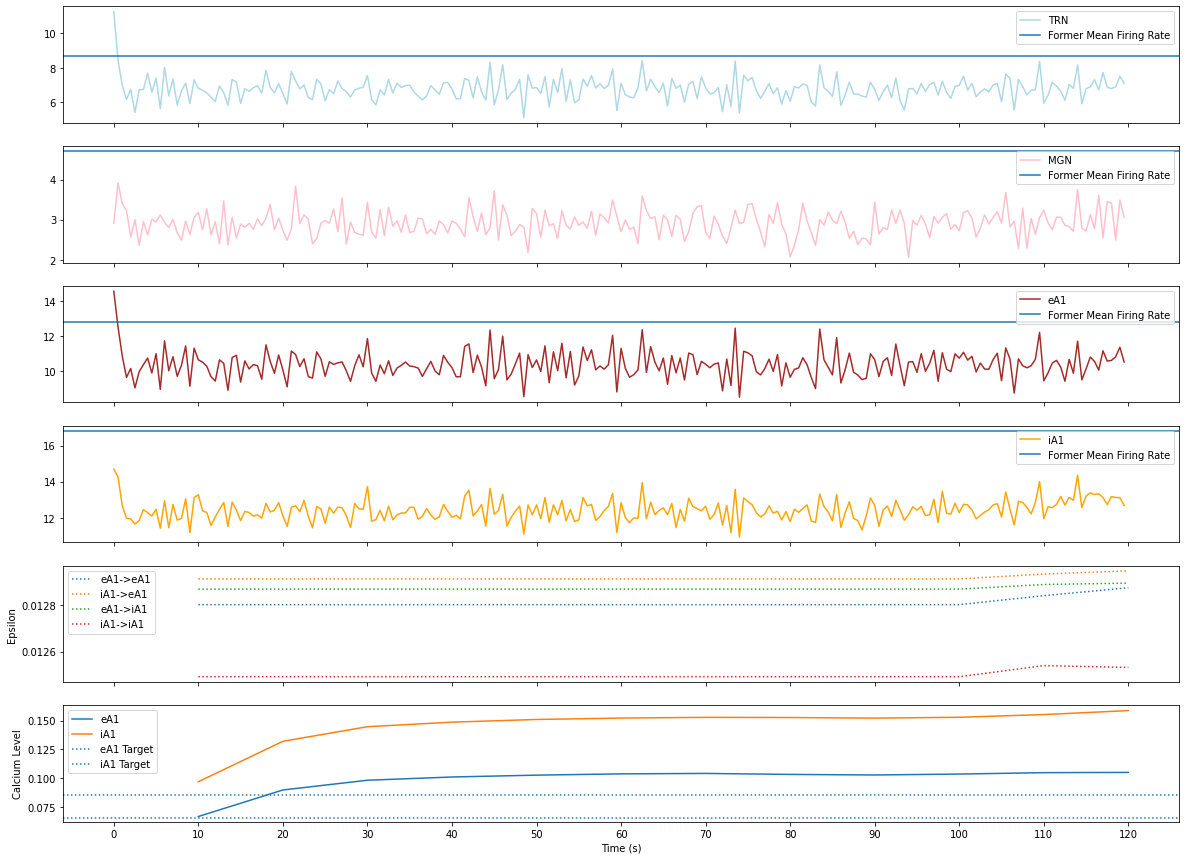

In [288]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])

'''
for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])
'''

tstart = 0
tstop = 120000
    
resolution = 500

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2800).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = range(20, 240+1, 20)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.065, ls=":", label="eA1 Target")
ax[5].axhline(.085, ls=":", label="iA1 Target")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

plt.xticks(range(0, 240+1, 20), range(0, 120+1, 10))
# ax[2].spines.right.set_visible(False)
# ax[2].spines.top.set_visible(False)

[ax[_].legend() for _ in range(6)];

# plt.suptitle(f[0]\
#              , fontsize=15);

# meanFiringRates(p)


# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-plasticity-" + fl + ".pdf")

## T=6

ctx_epsilon_decrease = .8

eCa = 13 / 200

iCa = 17 / 200

gr_scaling = .0001

240000.

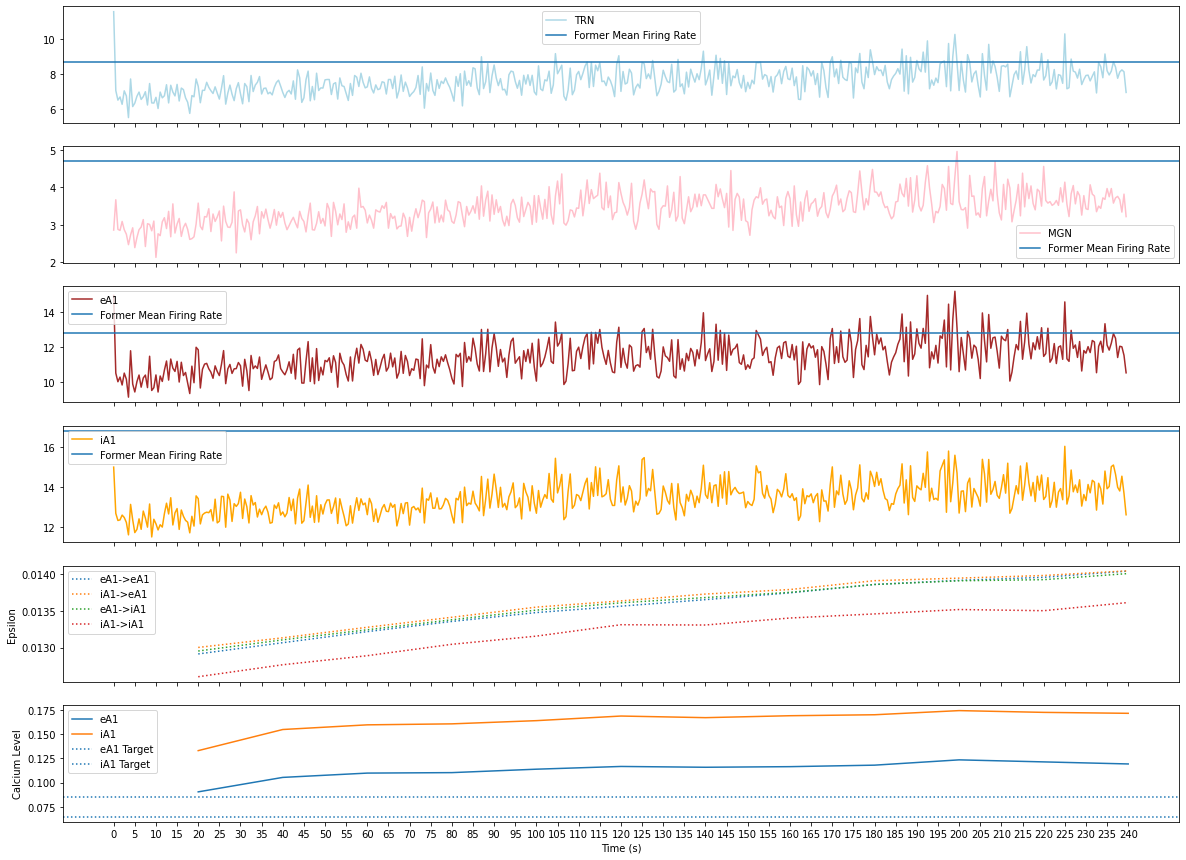

In [207]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])

'''
for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])
'''

tstart = 0
tstop = 240000
    
resolution = 500

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2800).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = range(40, 480+1, 40)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.065, ls=":", label="eA1 Target")
ax[5].axhline(.085, ls=":", label="iA1 Target")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

plt.xticks(range(0, 480+1, 10), range(0, 240+1, 5))
# ax[2].spines.right.set_visible(False)
# ax[2].spines.top.set_visible(False)

[ax[_].legend() for _ in range(6)];

# plt.suptitle(f[0]\
#              , fontsize=15);

# meanFiringRates(p)


# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-plasticity-" + fl + ".pdf")

## T=7

ctx_epsilon_decrease = .9

eCa = 13 / 100

iCa = 17 / 100

gr_scaling = .0001

240000.

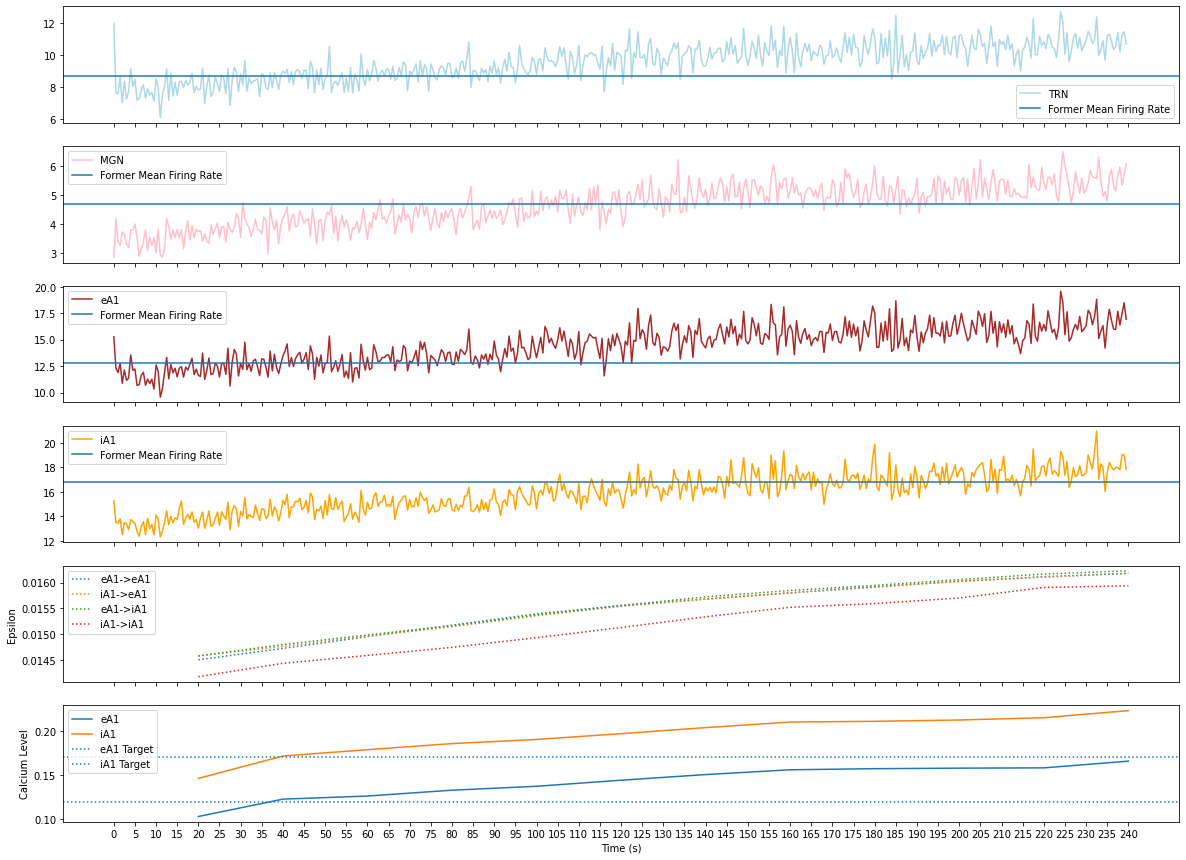

In [193]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])

'''
for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])
'''

tstart = 0
tstop = 240000
    
resolution = 500

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2800).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = range(40, 480+1, 40)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.12, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

plt.xticks(range(0, 480+1, 10), range(0, 240+1, 5))
# ax[2].spines.right.set_visible(False)
# ax[2].spines.top.set_visible(False)

[ax[_].legend() for _ in range(6)];

# plt.suptitle(f[0]\
#              , fontsize=15);

# meanFiringRates(p)


# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-plasticity-" + fl + ".pdf")

## T=8

ctx_epsilon_decrease = .95

eCa = 13 / 100

iCa = 17 / 100

gr_scaling = .0001

240000.

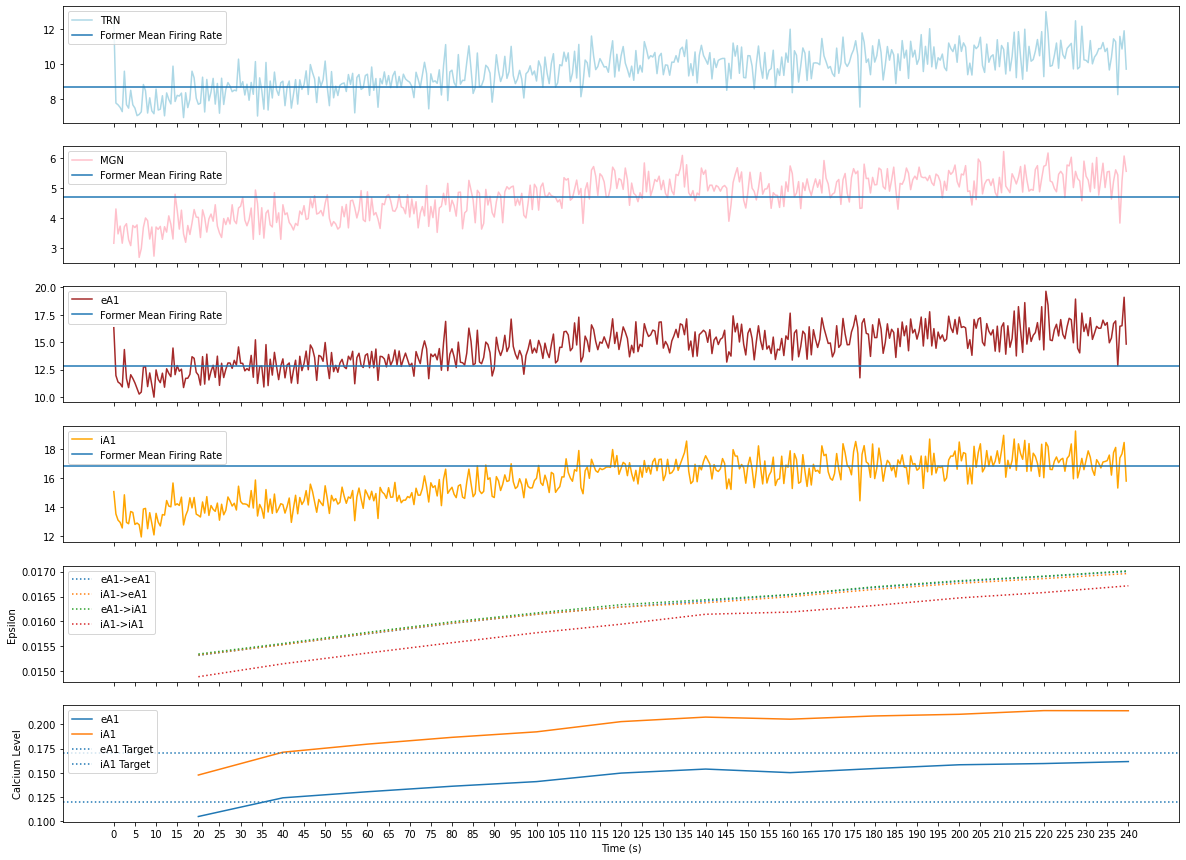

In [239]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])

'''
for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])
'''

tstart = 0
tstop = 240000
    
resolution = 500

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2800).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = range(40, 480+1, 40)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

plt.xticks(range(0, 480+1, 10), range(0, 240+1, 5))
# ax[2].spines.right.set_visible(False)
# ax[2].spines.top.set_visible(False)

[ax[_].legend() for _ in range(6)];

# plt.suptitle(f[0]\
#              , fontsize=15);

# meanFiringRates(p)


# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-plasticity-" + fl + ".pdf")

## T=9

ctx_epsilon_decrease = .95

eCa = 13 / 100

iCa = 17 / 100

gr_scaling = .0001

240000.

g_curve = 'linear'

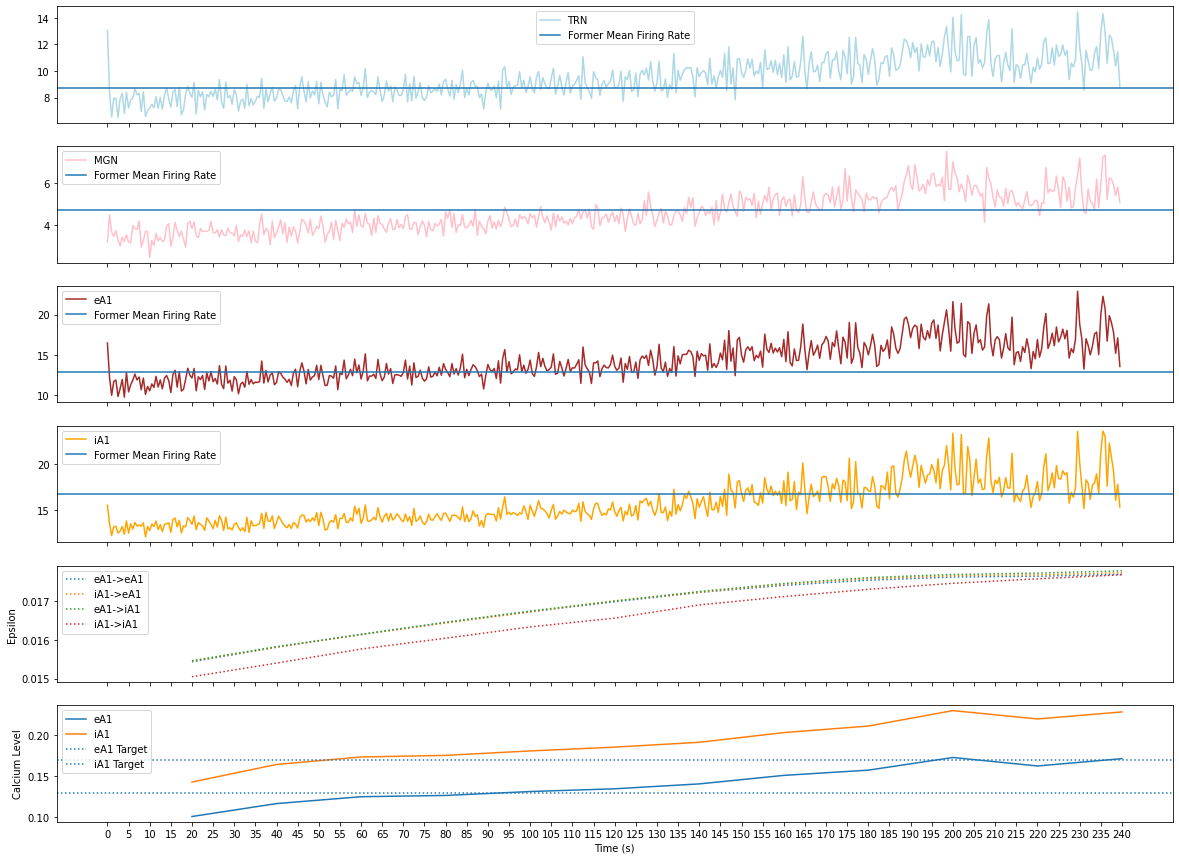

In [246]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])

'''
for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])
'''

tstart = 0
tstop = 240000
    
resolution = 500

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2800).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = range(40, 480+1, 40)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

plt.xticks(range(0, 480+1, 10), range(0, 240+1, 5))
# ax[2].spines.right.set_visible(False)
# ax[2].spines.top.set_visible(False)

[ax[_].legend() for _ in range(6)];

# plt.suptitle(f[0]\
#              , fontsize=15);

# meanFiringRates(p)


# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-plasticity-" + fl + ".pbdf")

In [247]:
gatherCalcium(pth, fl, 8)['eA1']

array([0.10106229, 0.11681399, 0.12519379, 0.12672976, 0.13150363,
       0.13484814, 0.14082396, 0.15119299, 0.15759056, 0.17300331,
       0.16268535, 0.17162225])

## T=10

ctx_epsilon_decrease = .9

eCa = (13 / 100) - .05

iCa = (17 / 100) - .05

gr_scaling = .0001

240000.

g_curve = 'linear'

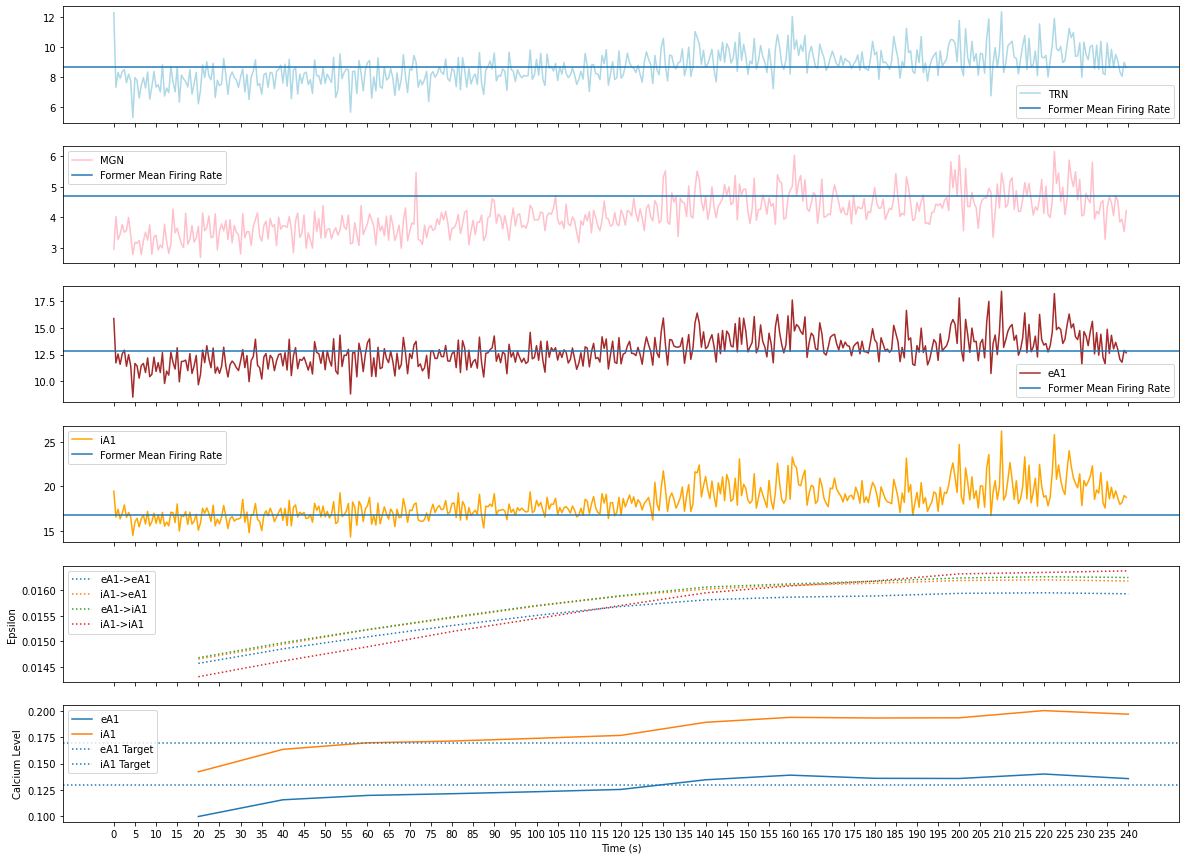

In [436]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])

'''
for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])
'''

tstart = 0
tstop = 240000
    
resolution = 500

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = range(40, 480+1, 40)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

plt.xticks(range(0, 480+1, 10), range(0, 240+1, 5))
# ax[2].spines.right.set_visible(False)
# ax[2].spines.top.set_visible(False)

[ax[_].legend() for _ in range(6)];

# plt.suptitle(f[0]\
#              , fontsize=15);

# meanFiringRates(p)


# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-plasticity-" + fl + ".pdf")

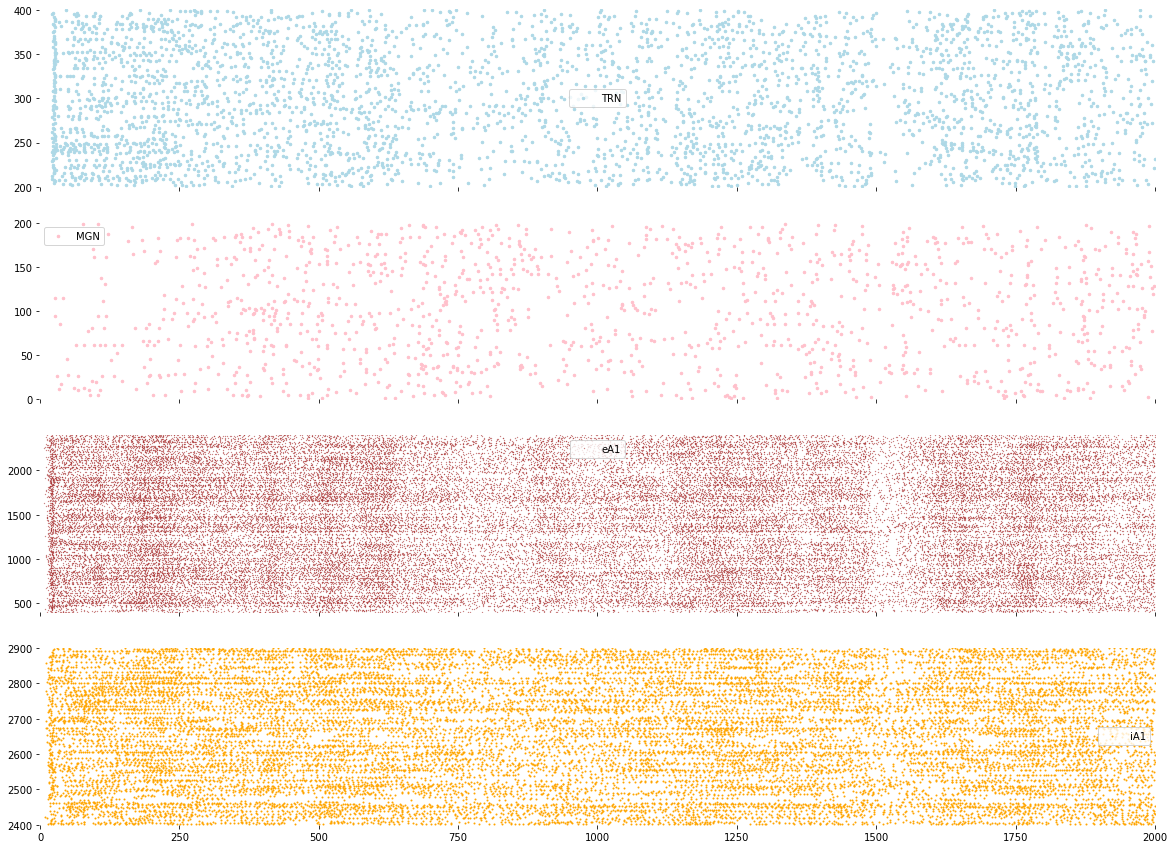

In [437]:
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])


# tstart = 220000
tstart = 0
tstop = 2000
# tstop = 222500

gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop)\
.raster_plot(ax=ax[0], dt=10, display=False, color='lightblue', ms=5, label="TRN")

gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop)\
.raster_plot(ax=ax[1], dt=10, display=False, color='pink', ms=5, label="MGN")

gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop)\
.raster_plot(ax=ax[2], dt=10, display=False, color='brown', ms=.5, label="eA1")

gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop)\
.raster_plot(ax=ax[3], dt=10, display=False, color='orange', ms=2, label="iA1")

for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
#     ax[x].tick_params(labelbottom=False)
#     ax[x].get_yaxis().set_ticks([])
    ax[x].legend()
    

# fig.suptitle(f[0], fontsize=15);


# plt.savefig("/home/pbr-student/Downloads/thesis-plots/raster-" + f[0] + ".pdf")

## T=11
### Mistake corrected

ctx_epsilon_decrease = .9

eCa = (13 / 100) - .05

iCa = (17 / 100) - .05

gr_scaling = .0001

240000.

g_curve = 'linear'

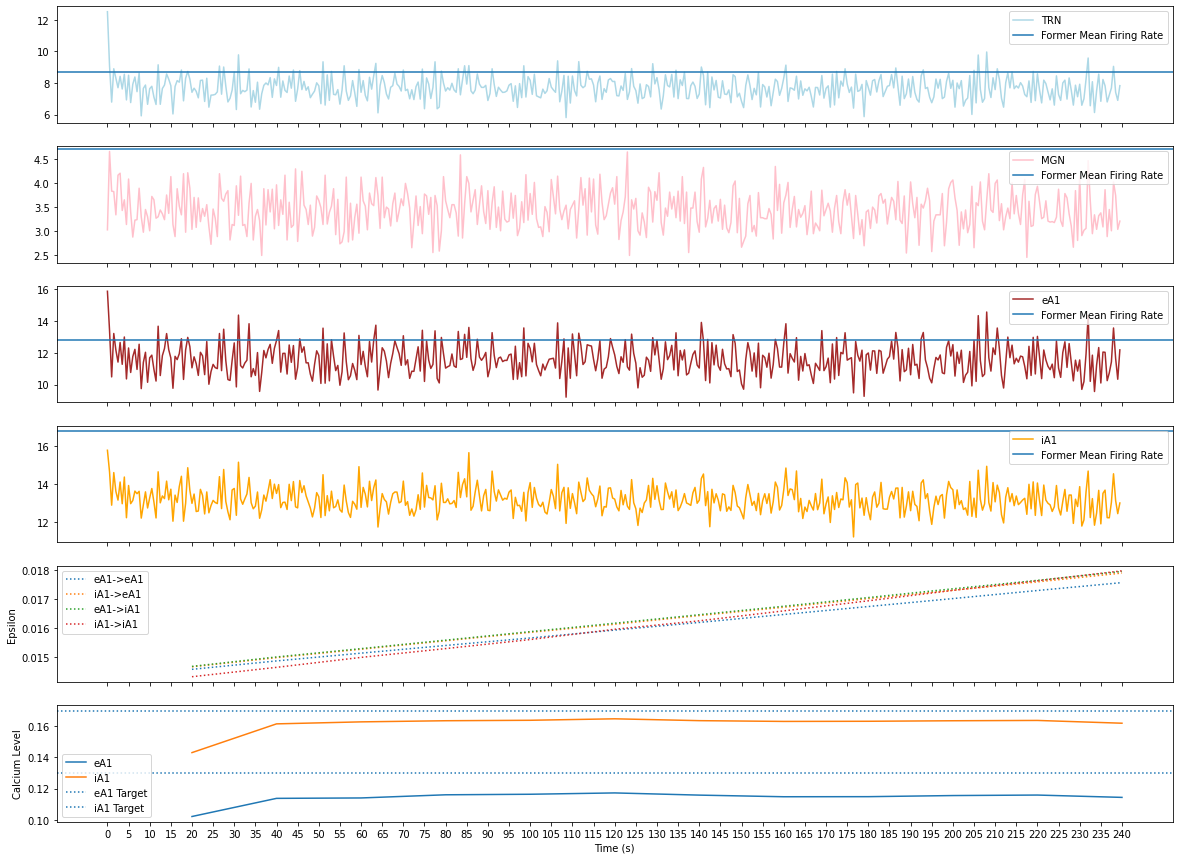

In [294]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])

'''
for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])
'''

tstart = 0
tstop = 240000
    
resolution = 500

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2800).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = range(40, 480+1, 40)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

plt.xticks(range(0, 480+1, 10), range(0, 240+1, 5))
# ax[2].spines.right.set_visible(False)
# ax[2].spines.top.set_visible(False)

[ax[_].legend() for _ in range(6)];

# plt.suptitle(f[0]\
#              , fontsize=15);

# meanFiringRates(p)


# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-plasticity-" + fl + ".pdf")

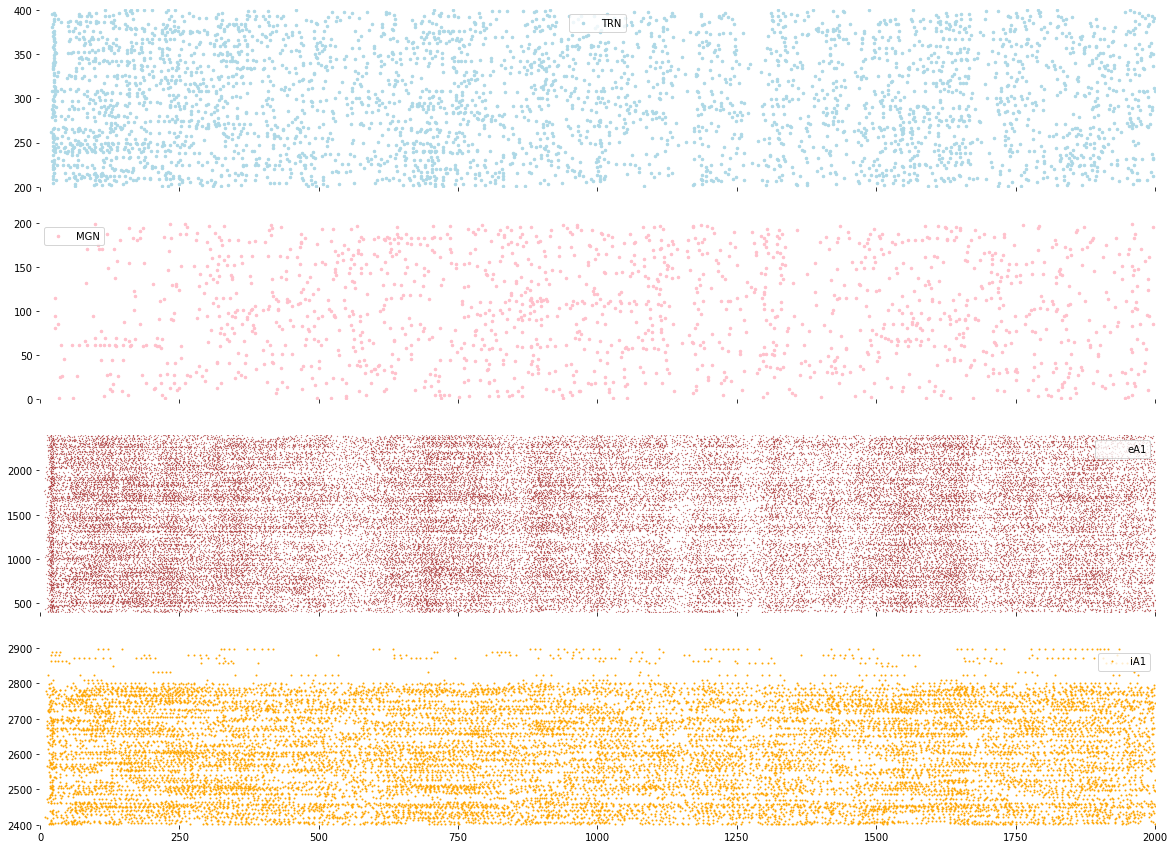

In [295]:
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])


# tstart = 220000
tstart = 0
tstop = 2000
# tstop = 222500

gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop)\
.raster_plot(ax=ax[0], dt=10, display=False, color='lightblue', ms=5, label="TRN")

gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop)\
.raster_plot(ax=ax[1], dt=10, display=False, color='pink', ms=5, label="MGN")

gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop)\
.raster_plot(ax=ax[2], dt=10, display=False, color='brown', ms=.5, label="eA1")

gatherSpikes(pth, fl, 8, "iA1", 2401, 2800).time_slice(tstart, tstop)\
.raster_plot(ax=ax[3], dt=10, display=False, color='orange', ms=2, label="iA1")

for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
#     ax[x].tick_params(labelbottom=False)
#     ax[x].get_yaxis().set_ticks([])
    ax[x].legend()
    

# fig.suptitle(f[0], fontsize=15);


# plt.savefig("/home/pbr-student/Downloads/thesis-plots/raster-" + f[0] + ".pdf")

## T=12
### Mistake corrected

ctx_epsilon_decrease = .9

eCa = (13 / 100)

iCa = (17 / 100)

iA1->eA1 and eA1->eA1 connection growth rate twice as fast as the rest

gr_scaling = .0001

240000.

g_curve = 'linear'

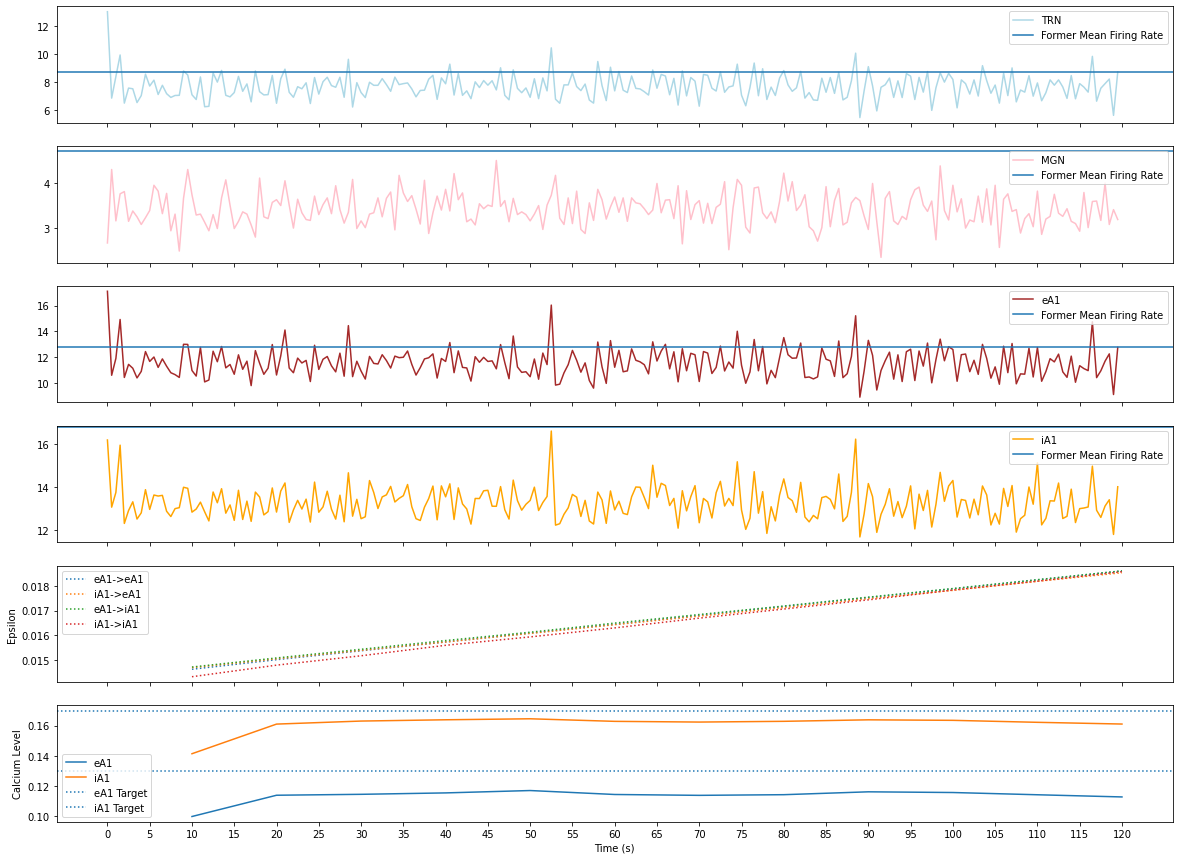

In [335]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])

'''
for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])
'''

tstart = 0
tstop = 120000
    
resolution = 500

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2800).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = range(20, 240+1, 20)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

plt.xticks(range(0, 240+1, 10), range(0, 120+1, 5))
# ax[2].spines.right.set_visible(False)
# ax[2].spines.top.set_visible(False)

[ax[_].legend() for _ in range(6)];

# plt.suptitle(f[0]\
#              , fontsize=15);

# meanFiringRates(p)


# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-plasticity-" + fl + ".pdf")

## T=13
### Mistake corrected

ctx_epsilon_decrease = .9

eCa = (13 / 100)

iCa = (17 / 100)

eA1->iA1 and eA1->eA1 connection growth rate 10x as fast as the rest

gr_scaling = .0001

120000.

g_curve = 'linear'

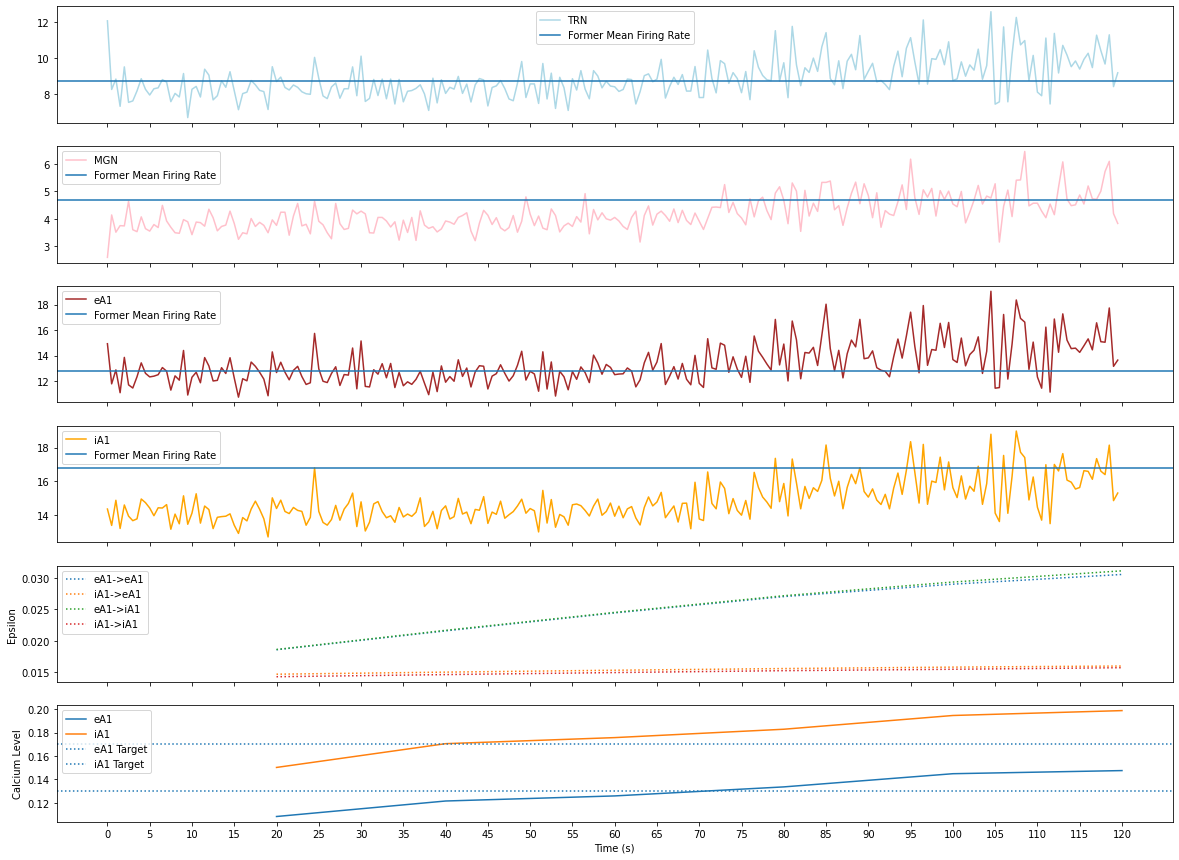

In [341]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])

'''
for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])
'''

tstart = 0
tstop = 120000
    
resolution = 500

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2800).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = range(40, 240+1, 40)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

plt.xticks(range(0, 240+1, 10), range(0, 120+1, 5))
# ax[2].spines.right.set_visible(False)
# ax[2].spines.top.set_visible(False)

[ax[_].legend() for _ in range(6)];

# plt.suptitle(f[0]\
#              , fontsize=15);

# meanFiringRates(p)


# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-plasticity-" + fl + ".pdf")

## T=14
### Mistake corrected

ctx_epsilon_decrease = .9

eCa = (13 / 100)

iCa = (17 / 100)

eA1->iA1 and eA1->eA1 connection growth rate 8x as fast as the rest

gr_scaling = .0001

240000.

g_curve = 'linear'

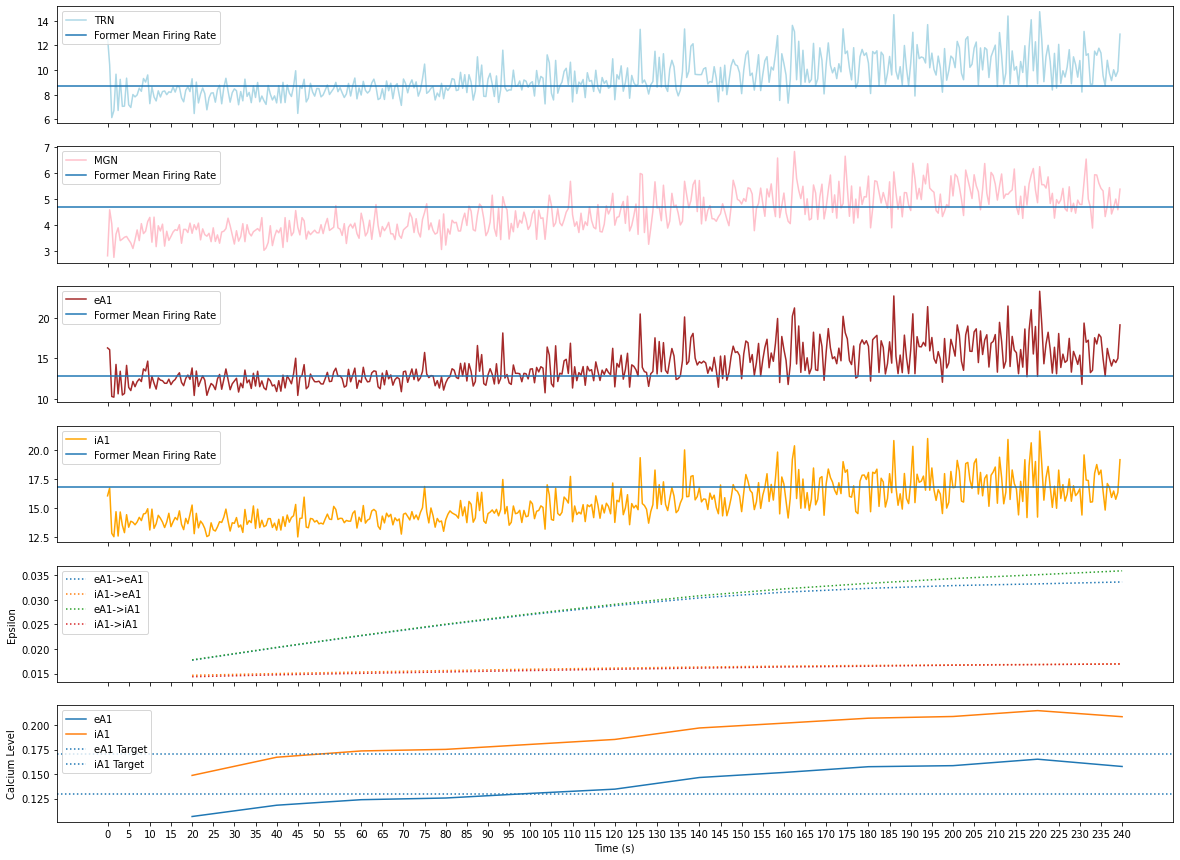

In [347]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])

'''
for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])
'''

tstart = 0
tstop = 240000
    
resolution = 500

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2800).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = range(40, 480+1, 40)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

plt.xticks(range(0, 480+1, 10), range(0, 240+1, 5))
# ax[2].spines.right.set_visible(False)
# ax[2].spines.top.set_visible(False)

[ax[_].legend() for _ in range(6)];

# plt.suptitle(f[0]\
#              , fontsize=15);

# meanFiringRates(p)


# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-plasticity-" + fl + ".pdf")

## T=15
### Mistake corrected

ctx_epsilon_decrease = .9

eCa = (13 / 100)

iCa = (17 / 100)

eA1->iA1 and eA1->eA1 connection growth rate 6x as fast as the rest

gr_scaling = .0001

240000.

g_curve = 'linear'

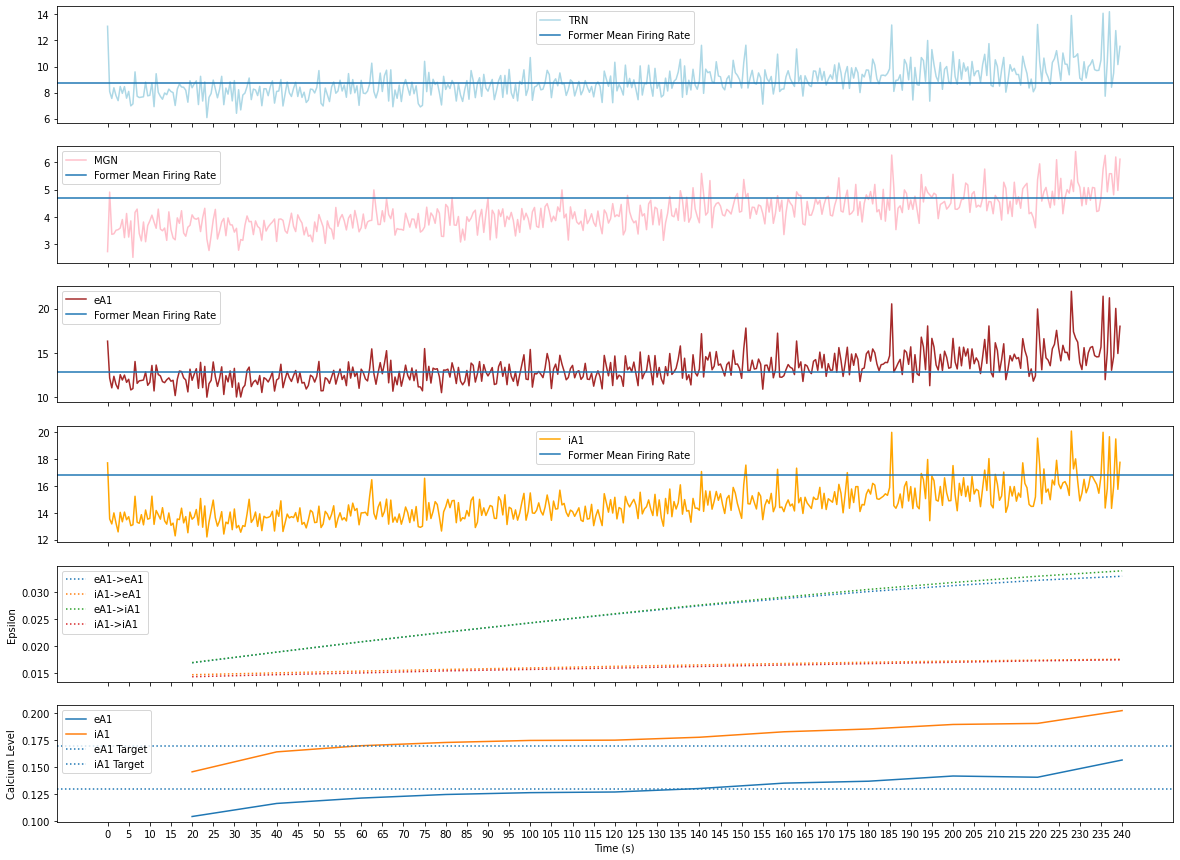

In [352]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])

'''
for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])
'''

tstart = 0
tstop = 240000
    
resolution = 500

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2800).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = range(40, 480+1, 40)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

plt.xticks(range(0, 480+1, 10), range(0, 240+1, 5))
# ax[2].spines.right.set_visible(False)
# ax[2].spines.top.set_visible(False)

[ax[_].legend() for _ in range(6)];

# plt.suptitle(f[0]\
#              , fontsize=15);

# meanFiringRates(p)


# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-plasticity-" + fl + ".pdf")

## T=16
### Mistake corrected

ctx_epsilon_decrease = .9

eCa = (13 / 100) - 0.05

iCa = (17 / 100) - 0.05

eA1->eA1 connection growth rate 10x as the rest

gr_scaling = .0001

240000.

g_curve = 'linear'

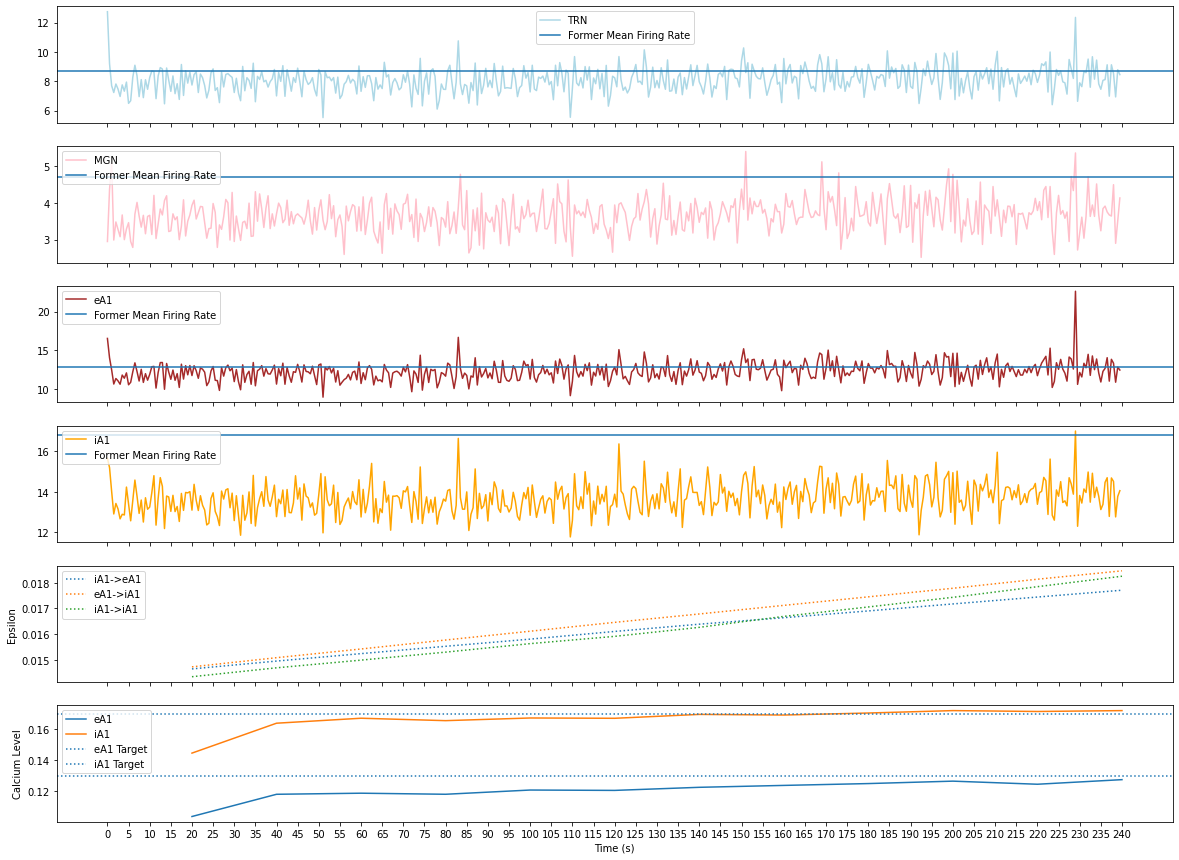

In [365]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])

'''
for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])
'''

tstart = 0
tstop = 240000
    
resolution = 500

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2800).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = range(40, 480+1, 40)

# ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

plt.xticks(range(0, 480+1, 10), range(0, 240+1, 5))
# ax[2].spines.right.set_visible(False)
# ax[2].spines.top.set_visible(False)

[ax[_].legend() for _ in range(6)];



## T=17
### Mistake corrected

ctx_epsilon_decrease = .9

eCa = (13 / 1000)

iCa = (17 / 1000)

eA1->eA1 connection growth rate 10x as the rest

gr_scaling = .0001

240000.

g_curve = 'linear'

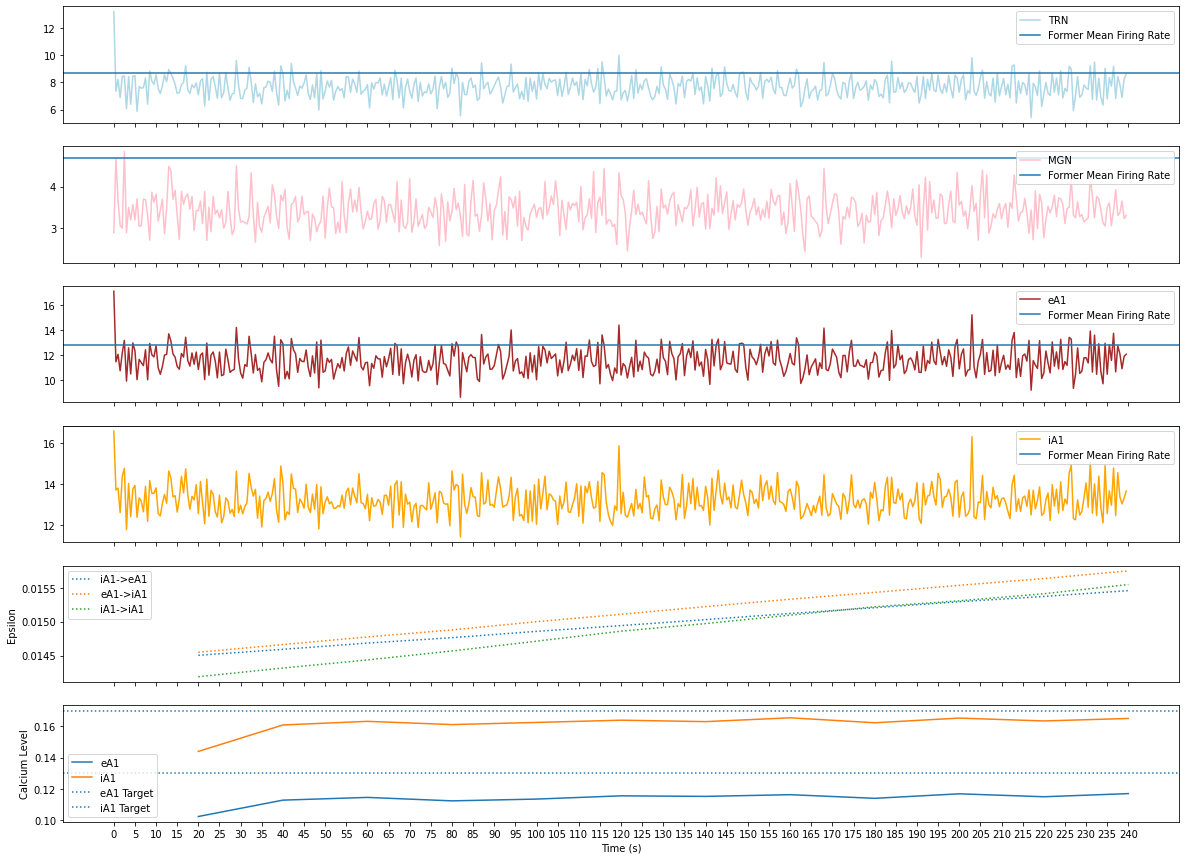

In [368]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])

'''
for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])bb
'''

tstart = 0
tstop = 240000
    
resolution = 500

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2800).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = range(40, 480+1, 40)

# ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

plt.xticks(range(0, 480+1, 10), range(0, 240+1, 5))
# ax[2].spines.right.set_visible(False)
# ax[2].spines.top.set_visible(False)

[ax[_].legend() for _ in range(6)];



## T=18
### Mistake corrected

ctx_epsilon_decrease = .9

eCa = (13 / 100)

iCa = (17 / 100)

eA1->eA1 connection growth rate 6x as the rest
eA1->iA1 connection growth rate 3x as the rest

gr_scaling = .0001

240000.

g_curve = 'linear'

## T=19
### Mistake corrected

ctx_epsilon_decrease = .9

eCa = (13 / 100)

iCa = (17 / 100)

eA1->eA1 connection growth rate 3x as the rest
eA1->iA1 connection growth rate 2x as the rest

gr_scaling = .0001

240000.

g_curve = 'linear'

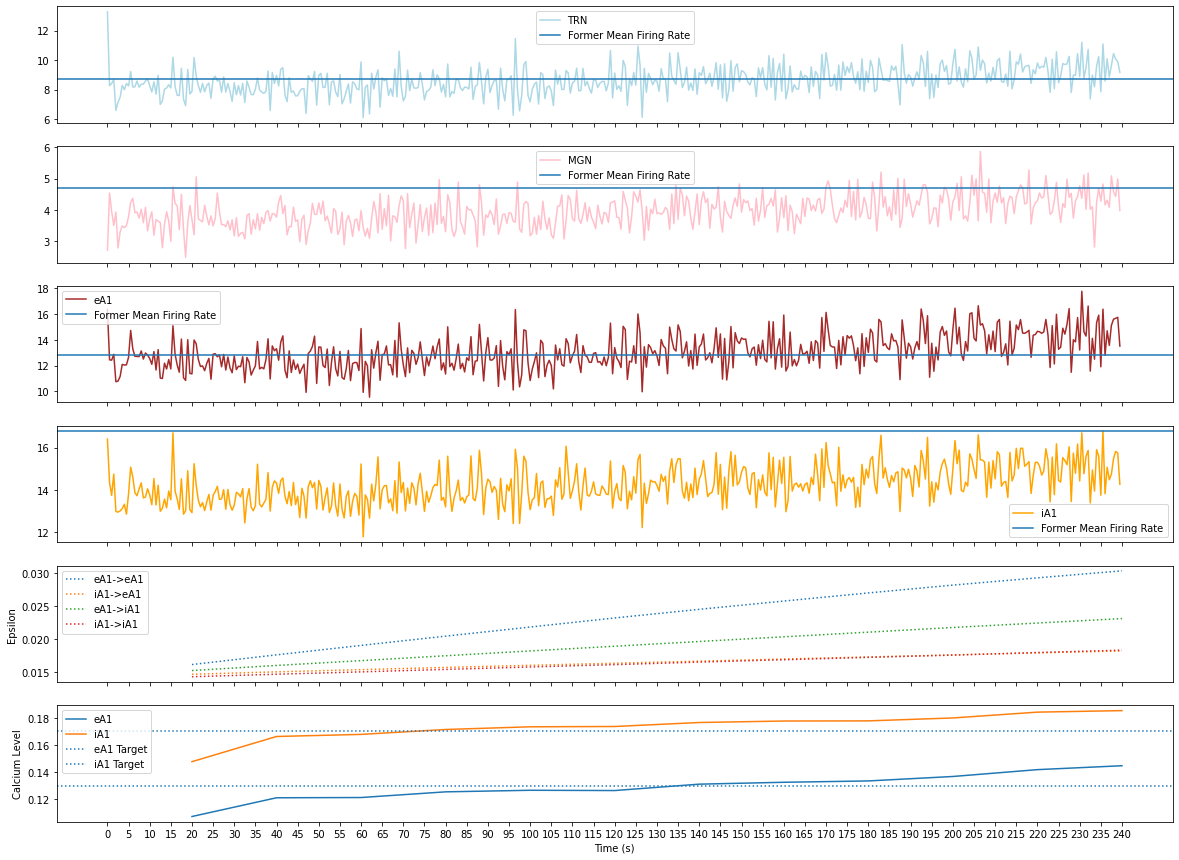

In [383]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])

'''
for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])bb
'''

tstart = 0
tstop = 240000
    
resolution = 500

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2800).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = range(40, 480+1, 40)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

plt.xticks(range(0, 480+1, 10), range(0, 240+1, 5))
# ax[2].spines.right.set_visible(False)
# ax[2].spines.top.set_visible(False)

[ax[_].legend() for _ in range(6)];



## T=20
### Mistake corrected

ctx_epsilon_decrease = .9

eCa = (13 / 100)

iCa = (17 / 100)

eA1->eA1 connection growth rate 3x as the rest
eA1->iA1 connection growth rate 2x as the rest

gr_scaling = .001

240000.

g_curve = 'linear'

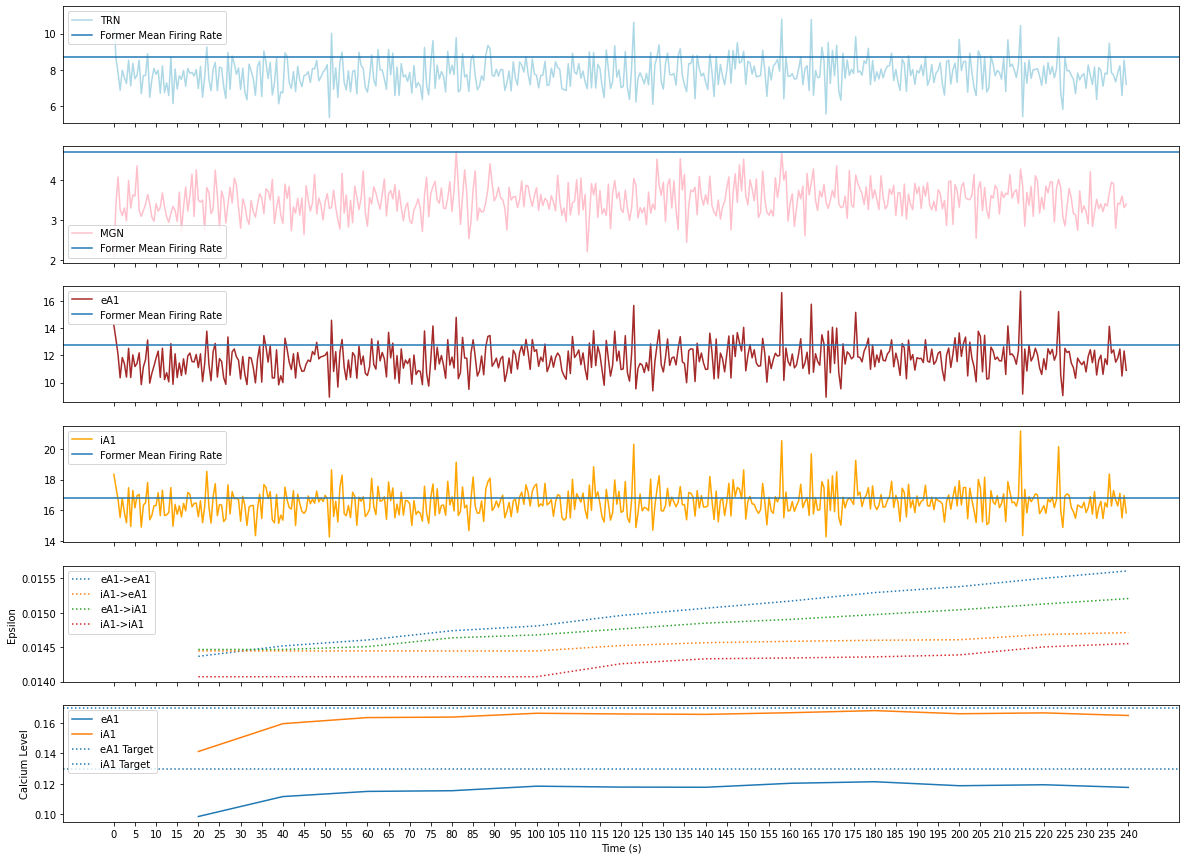

In [398]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])

'''
for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])bb
'''

tstart = 0
tstop = 240000
    
resolution = 500

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = range(40, 480+1, 40)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

plt.xticks(range(0, 480+1, 10), range(0, 240+1, 5))
# ax[2].spines.right.set_visible(False)
# ax[2].spines.top.set_visible(False)

[ax[_].legend() for _ in range(6)];



## T=21
### Mistake corrected

ctx_epsilon_decrease = .9

eCa = (13 / 500)

iCa = (17 / 500)

eA1->eA1 connection growth rate 3x as the rest
eA1->iA1 connection growth rate 2x as the rest

gr_scaling = .0005

240000.

g_curve = 'linear'

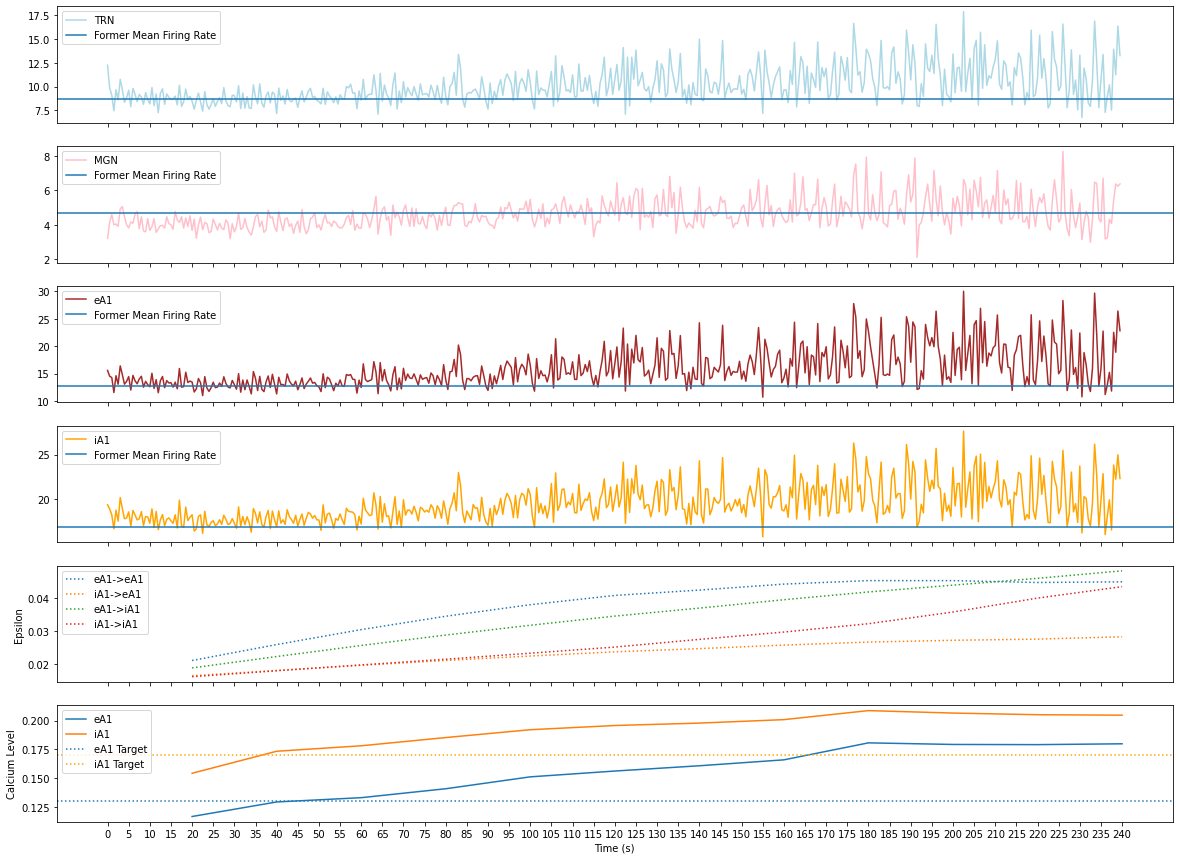

In [394]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])

'''
for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])bb
'''

tstart = 0
tstop = 240000
    
resolution = 500

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = range(40, 480+1, 40)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

plt.xticks(range(0, 480+1, 10), range(0, 240+1, 5))
# ax[2].spines.right.set_visible(False)
# ax[2].spines.top.set_visible(False)

[ax[_].legend() for _ in range(6)];



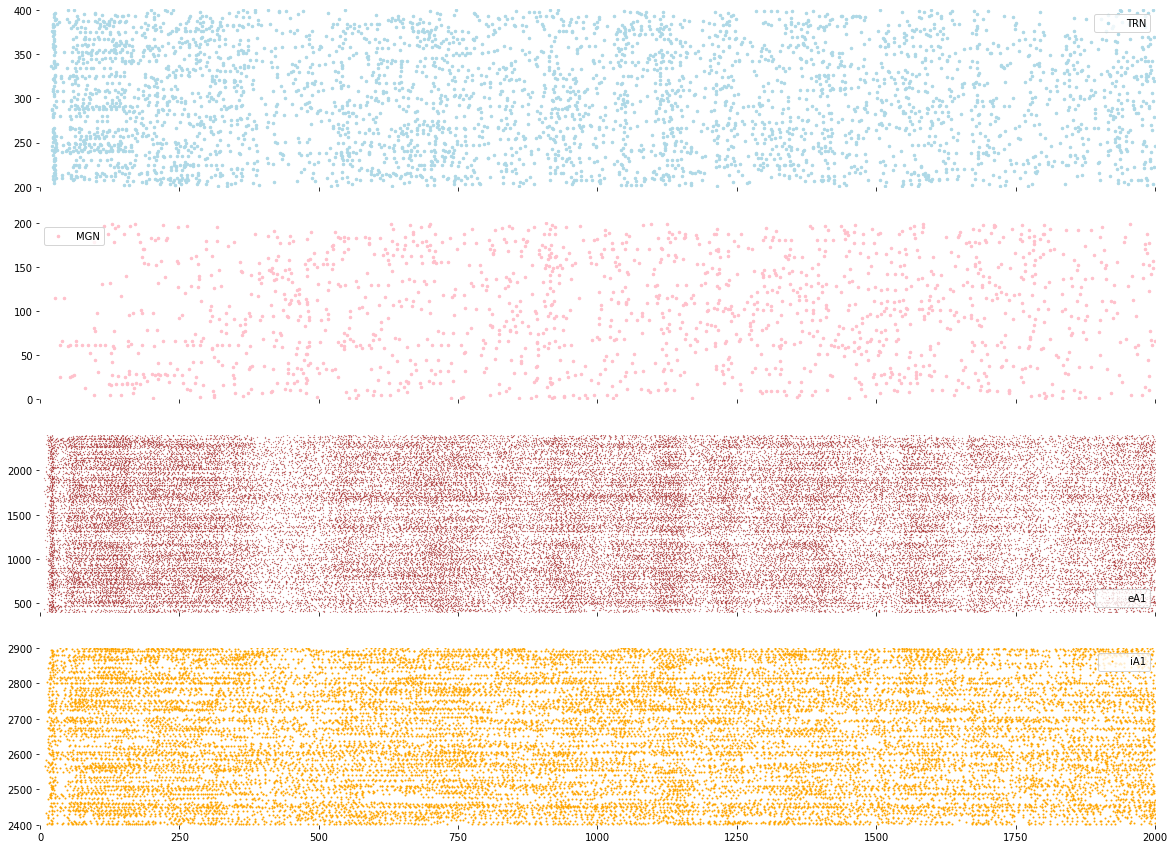

In [393]:
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])


# tstart = 220000
tstart = 0
tstop = 2000
# tstop = 222500

gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop)\
.raster_plot(ax=ax[0], dt=10, display=False, color='lightblue', ms=5, label="TRN")

gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop)\
.raster_plot(ax=ax[1], dt=10, display=False, color='pink', ms=5, label="MGN")

gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop)\
.raster_plot(ax=ax[2], dt=10, display=False, color='brown', ms=.5, label="eA1")

gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop)\
.raster_plot(ax=ax[3], dt=10, display=False, color='orange', ms=2, label="iA1")

for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
#     ax[x].tick_params(labelbottom=False)
#     ax[x].get_yaxis().set_ticks([])
    ax[x].legend()
    

# fig.suptitle(f[0], fontsize=15);


# plt.savefig("/home/pbr-student/Downloads/thesis-plots/raster-" + f[0] + ".pdf")

## T=22
### Mistake corrected

ctx_epsilon_decrease = .9

eCa = (13 / 500)

iCa = (17 / 500)

eA1->eA1 connection growth rate 2x as the rest

gr_scaling = .00001

240000.

g_curve = 'linear'

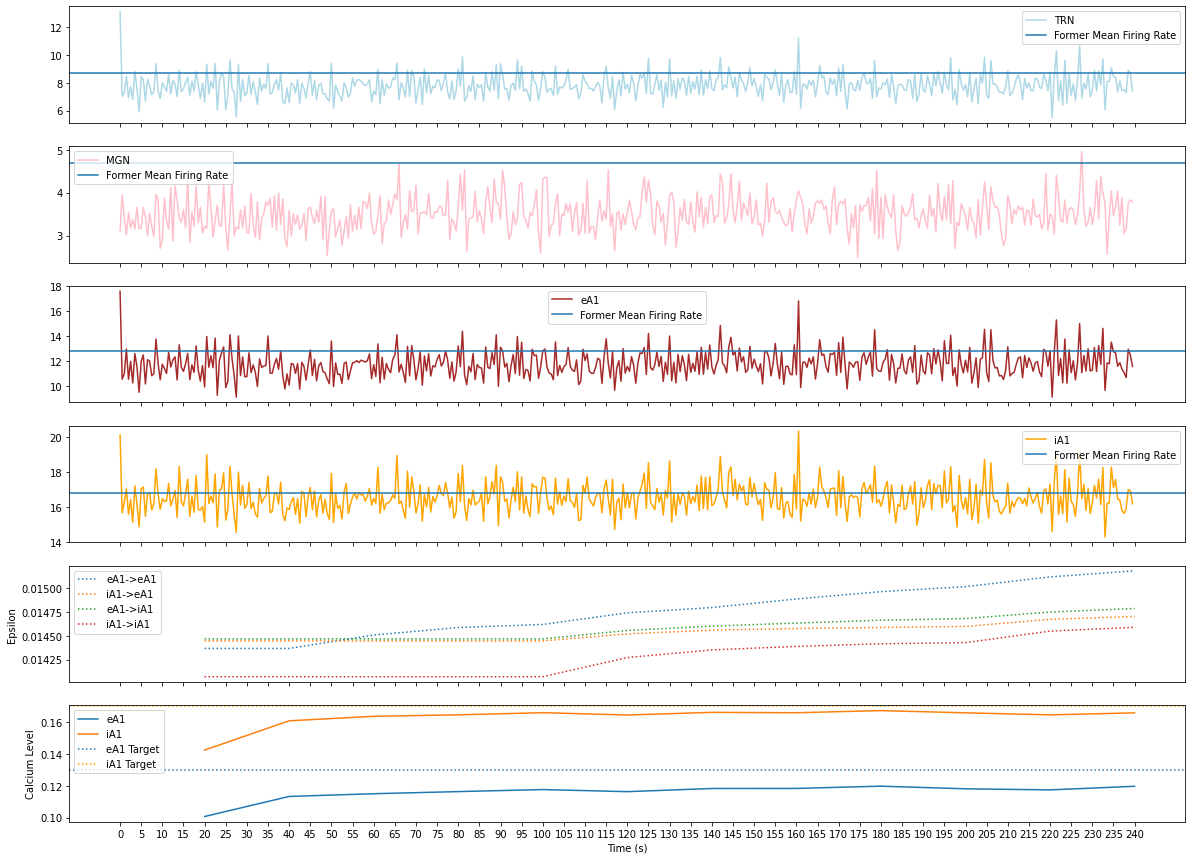

In [402]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])

'''
for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])bb
'''

tstart = 0
tstop = 240000
    
resolution = 500

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = range(40, 480+1, 40)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

plt.xticks(range(0, 480+1, 10), range(0, 240+1, 5))
# ax[2].spines.right.set_visible(False)
# ax[2].spines.top.set_visible(False)

[ax[_].legend() for _ in range(6)];



## T=23

Mistake corrected

ctx_epsilon_decrease = .9

eCa = (13 / 500)

iCa = (17 / 500)

eA1->eA1 connection growth rate 2x as the rest

gr_scaling = .00001

1000000.

g_curve = 'linear'

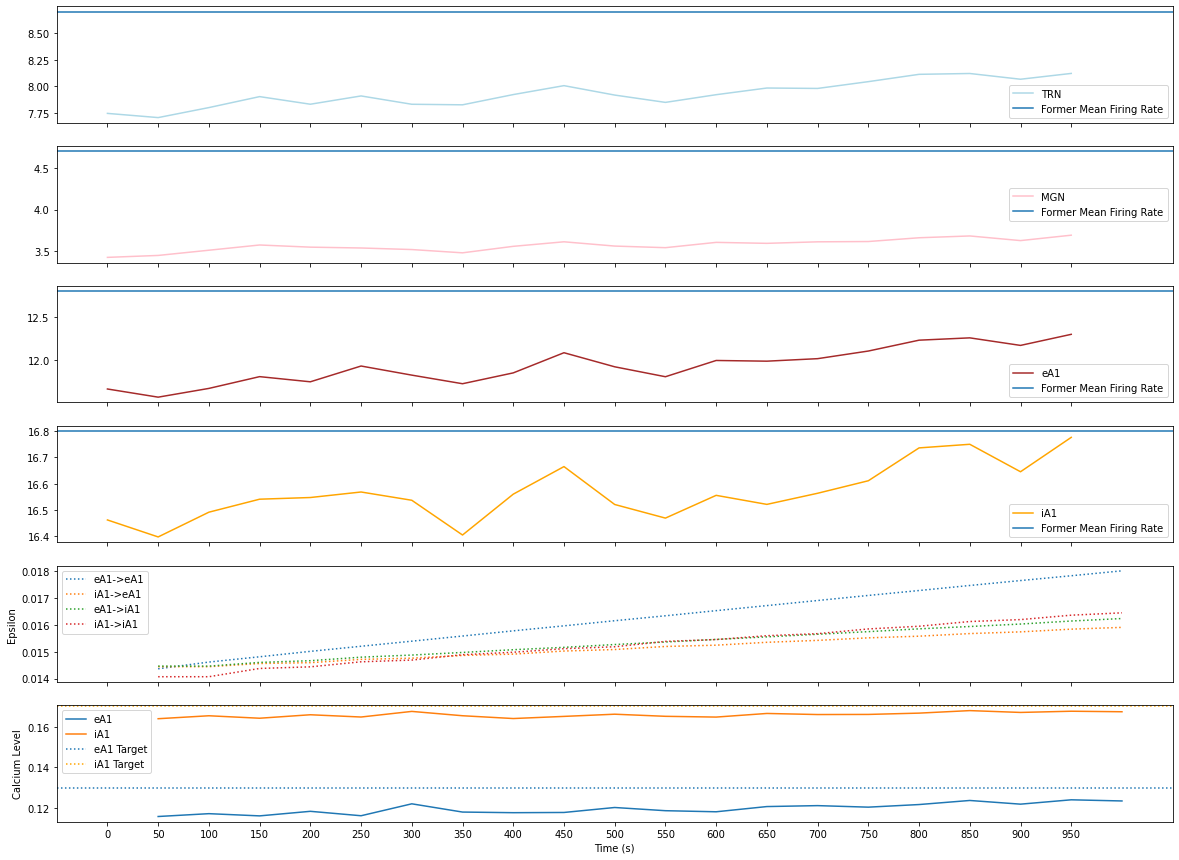

In [433]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])

'''
for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])bb
'''

tstart = 0
tstop = 1000000
    
resolution = 50000

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(1, 21, 1)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

plt.xticks(range(0, 20, 1), range(0, 1000, 50))
# ax[2].spines.right.set_visible(False)
# ax[2].spines.top.set_visible(False)

[ax[_].legend() for _ in range(6)];



## T=24

Mistake corrected

ctx_epsilon_decrease = .9

eCa = (13 / 500)

iCa = (17 / 500)

Only eA1->eA1 and eA1->iA1 connections are grown. The rest are not grown (by setting the growth rate to zero).

gr_scaling = .0001

200000.

g_curve = 'linear'

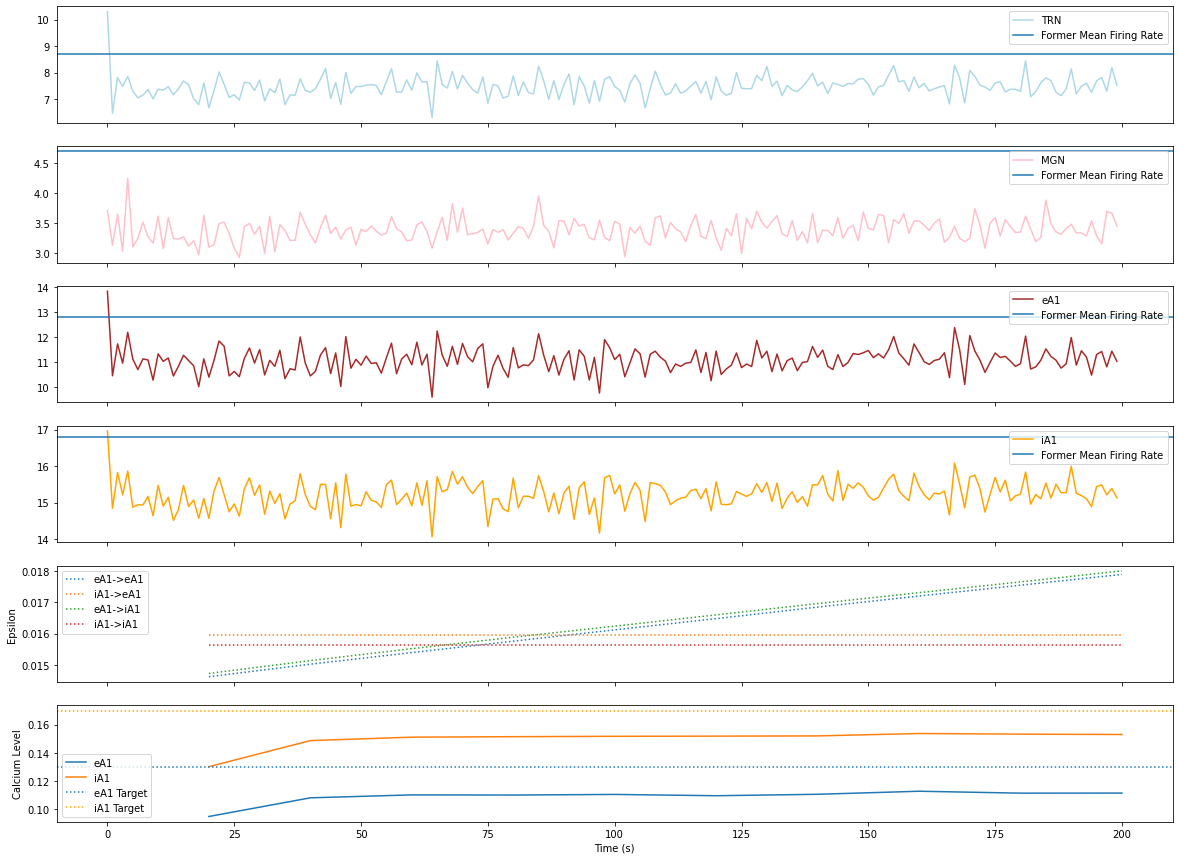

In [445]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])

'''
for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])bb
'''

tstart = 0
tstop = 200000
    
resolution = 1000

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(20, 201, 20)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

# plt.xticks(range(0, 20, 1), range(0, 1000, 50))
# ax[2].spines.right.set_visible(False)
# ax[2].spines.top.set_visible(False)

[ax[_].legend() for _ in range(6)];



## T=25

Mistake corrected

ctx_epsilon_decrease = .9

eCa = (13 / 500)

iCa = (17 / 500)

Only eA1->eA1 and eA1->iA1 connections are grown. The rest are not grown (by setting the growth rate to zero).

gr_scaling = .001

200000.

g_curve = 'linear'

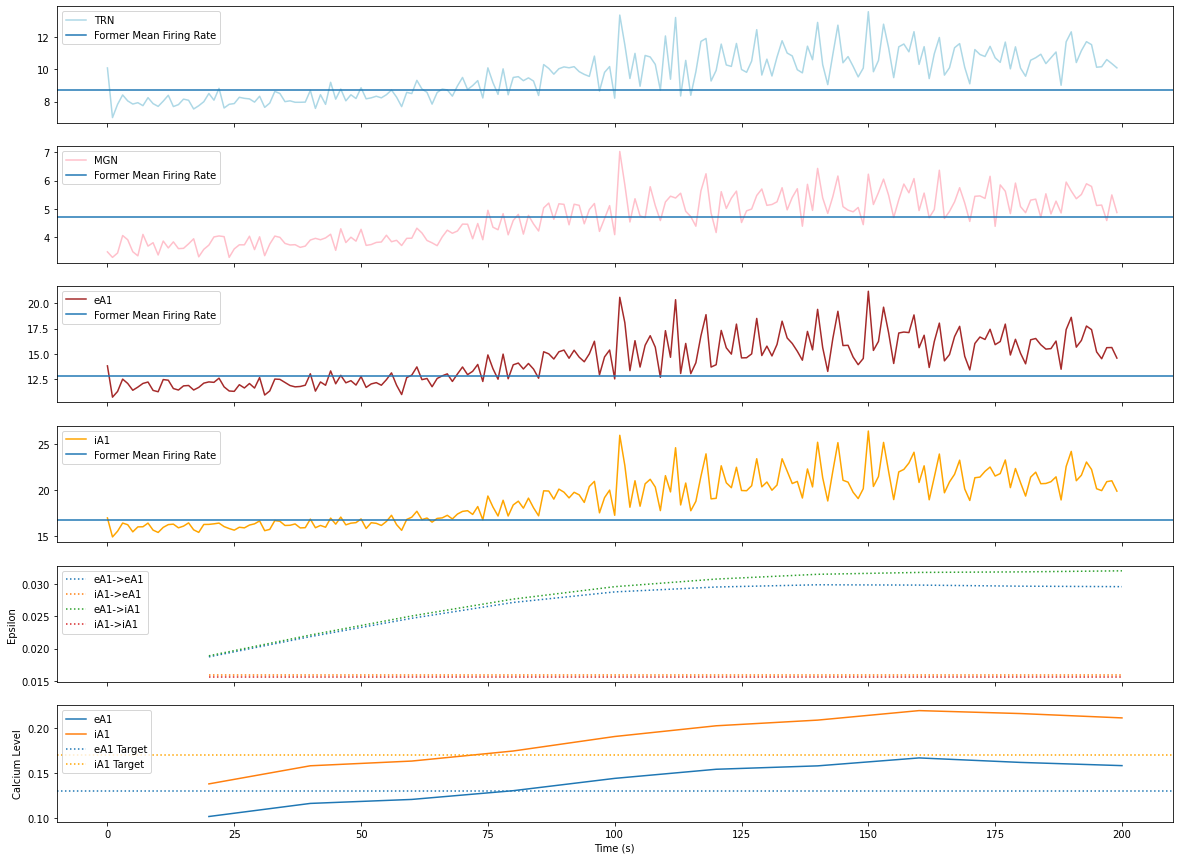

In [448]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)

tstart = 0
tstop = 200000
    
resolution = 1000

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(20, 201, 20)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")

# plt.xticks(range(0, 20, 1), range(0, 1000, 50))

[ax[_].legend() for _ in range(6)];


## T=26

Mistake corrected

ctx_epsilon_decrease = .9

eCa = (13 / 500) -.05

iCa = (17 / 500) -.05

Only eA1->eA1 and eA1->iA1 connections are grown. The rest are not grown (by setting the growth rate to zero).

gr_scaling = .001

200000.

g_curve = 'linear'

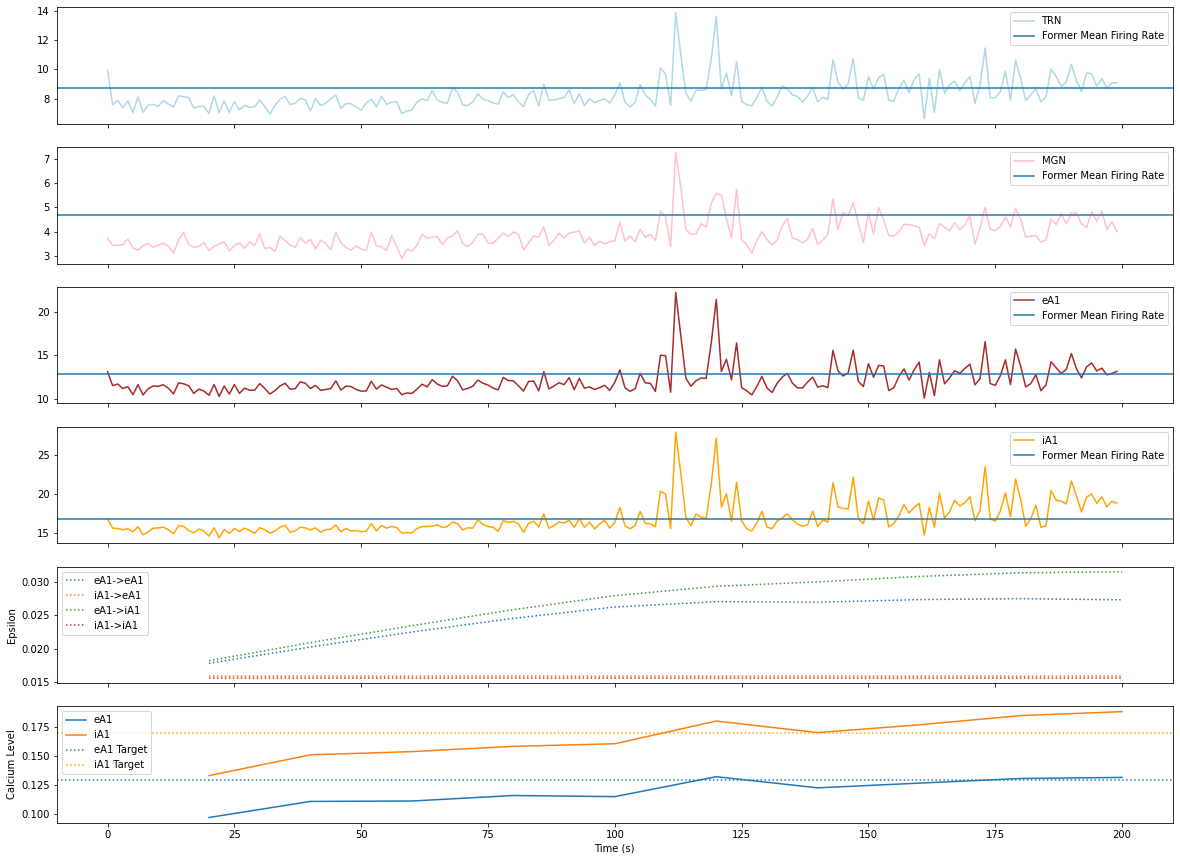

In [457]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)

tstart = 0
tstop = 200000
    
resolution = 1000

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(20, 201, 20)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")

# plt.xticks(range(0, 20, 1), range(0, 1000, 50))

[ax[_].legend() for _ in range(6)];


## T=26

Mistake corrected

ctx_epsilon_decrease = .9

eCa = (13 / 500) -.05

iCa = (17 / 500) -.05

Only eA1->eA1 and eA1->iA1 connections are grown. The rest are not grown (by setting the growth rate to zero).

gr_scaling = .0005

200000.

g_curve = 'linear'

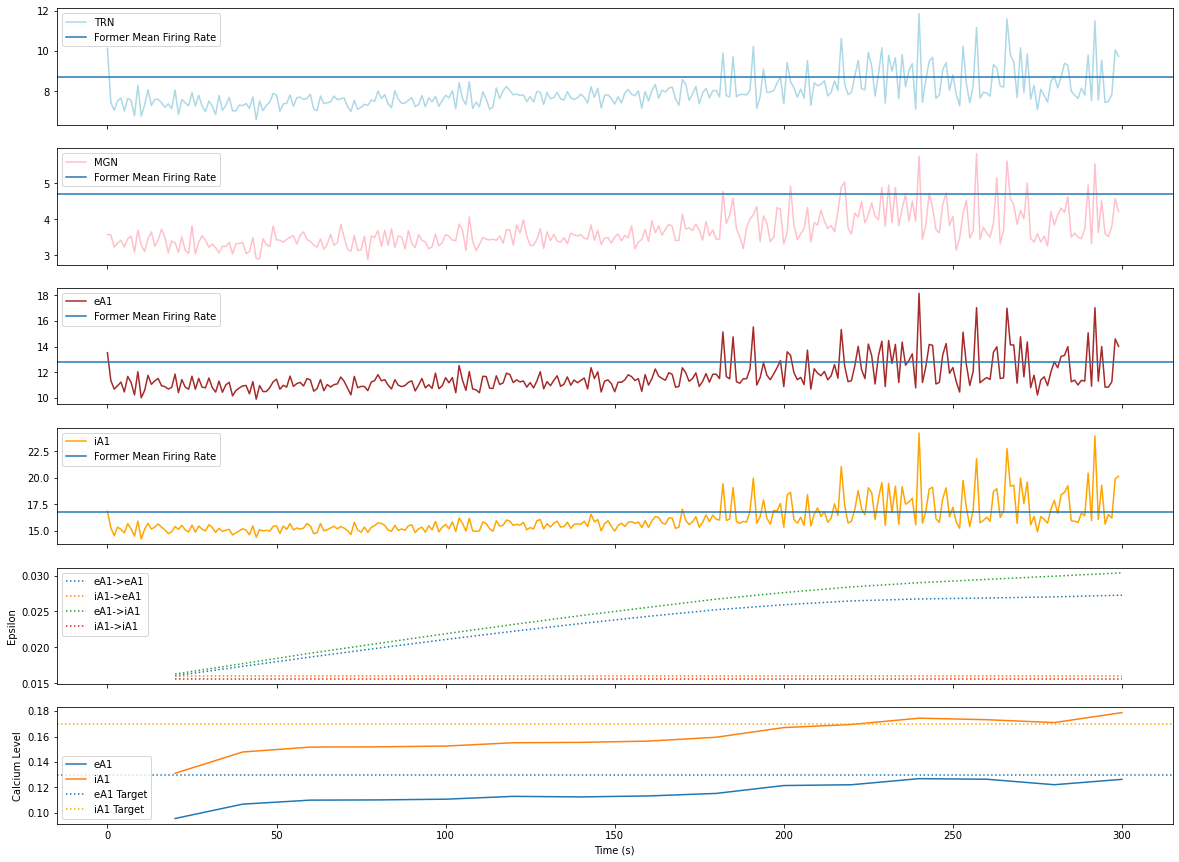

In [465]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)

tstart = 0
tstop = 300000
    
resolution = 1000

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(20, 301, 20)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")

# plt.xticks(range(0, 20, 1), range(0, 1000, 50))

[ax[_].legend() for _ in range(6)];

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-sp-" + fl + ".pdf")

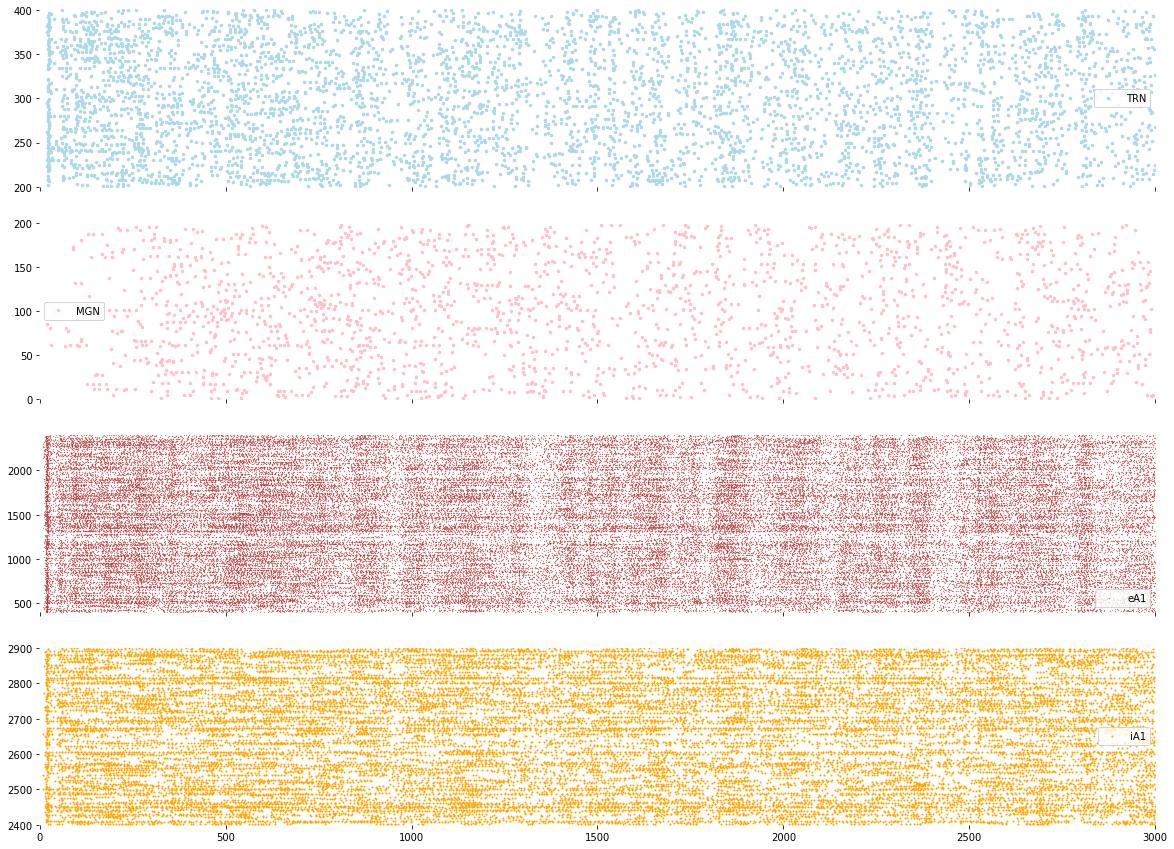

In [495]:
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])


# tstart = 220000
tstart = 0
tstop = 0.122158083000
# tstop = 222500

gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop)\
.raster_plot(ax=ax[0], dt=10, display=False, color='lightblue', ms=5, label="TRN")

gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop)\
.raster_plot(ax=ax[1], dt=10, display=False, color='pink', ms=5, label="MGN")

gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop)\
.raster_plot(ax=ax[2], dt=10, display=False, color='brown', ms=.5, label="eA1")

gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop)\
.raster_plot(ax=ax[3], dt=10, display=False, color='orange', ms=2, label="iA1")

for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
#     ax[x].tick_params(labelbottom=False)
#     ax[x].get_yaxis().set_ticks([])
    ax[x].legend()
    

# fig.suptitle(f[0], fontsize=15);


# plt.savefig("/home/pbr-student/Downloads/thesis-plots/raster-" + f[0] + ".pdf")

## T=27

Mistake corrected

ctx_epsilon_decrease = .9

eCa = (13 / 500) -.05

iCa = (17 / 500) -.05

Only iA1->eA1 and iA1->iA1 connections are grown. The rest are not grown (by setting the growth rate to zero).

gr_scaling = .0005

200000.

g_curve = 'linear'

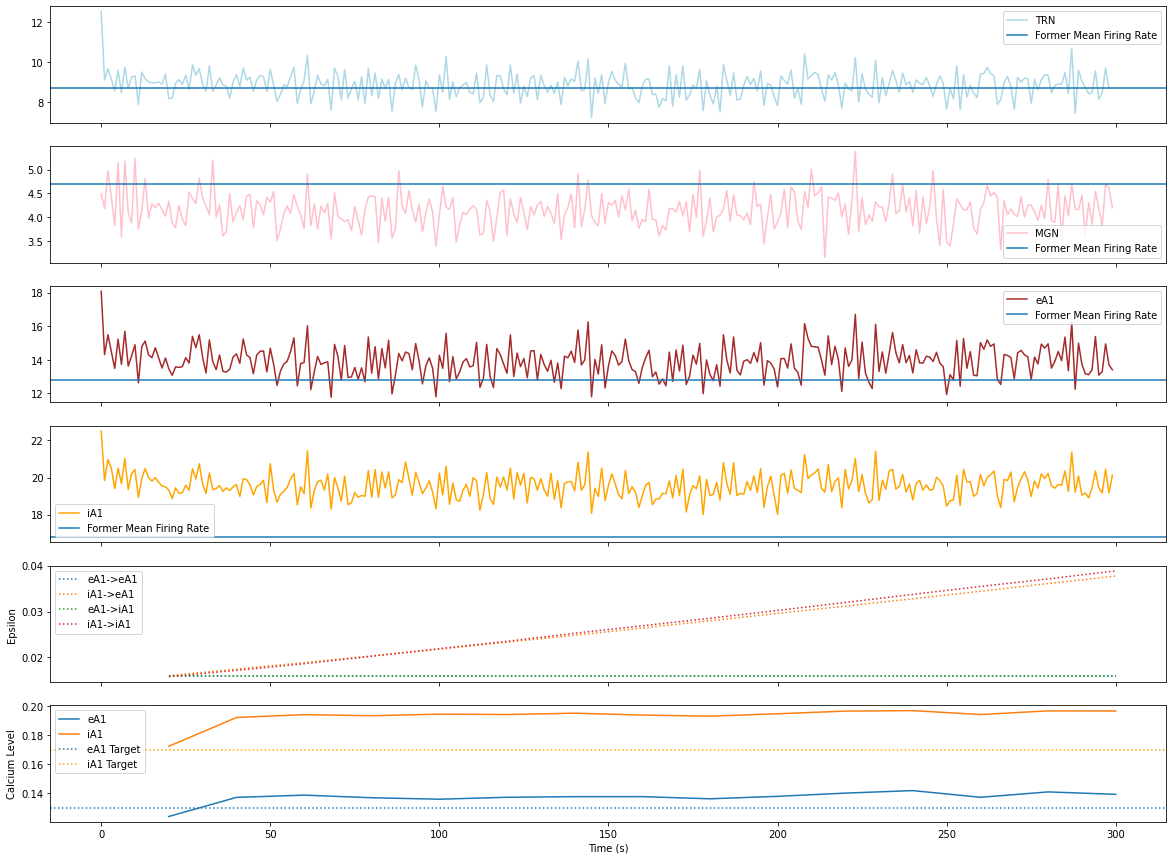

In [501]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)

tstart = 0
tstop = 300000
    
resolution = 1000

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(20, 301, 20)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")

# plt.xticks(range(0, 20, 1), range(0, 1000, 50))

[ax[_].legend() for _ in range(6)];

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-sp-" + fl + ".pdf")

In [516]:
c = gatherZ(pth, fl, 8)

In [519]:
ca = gatherCalcium(pth, fl, 8)

## T=29

Mistake corrected

ctx_epsilon_decrease = .9

eCa = (13 / 500)

iCa = (17 / 500)

Only eA1->eA1 connections are grown. The rest are not grown (by setting the growth rate to zero).

gr_scaling = .0001

200000.

g_curve = 'linear'

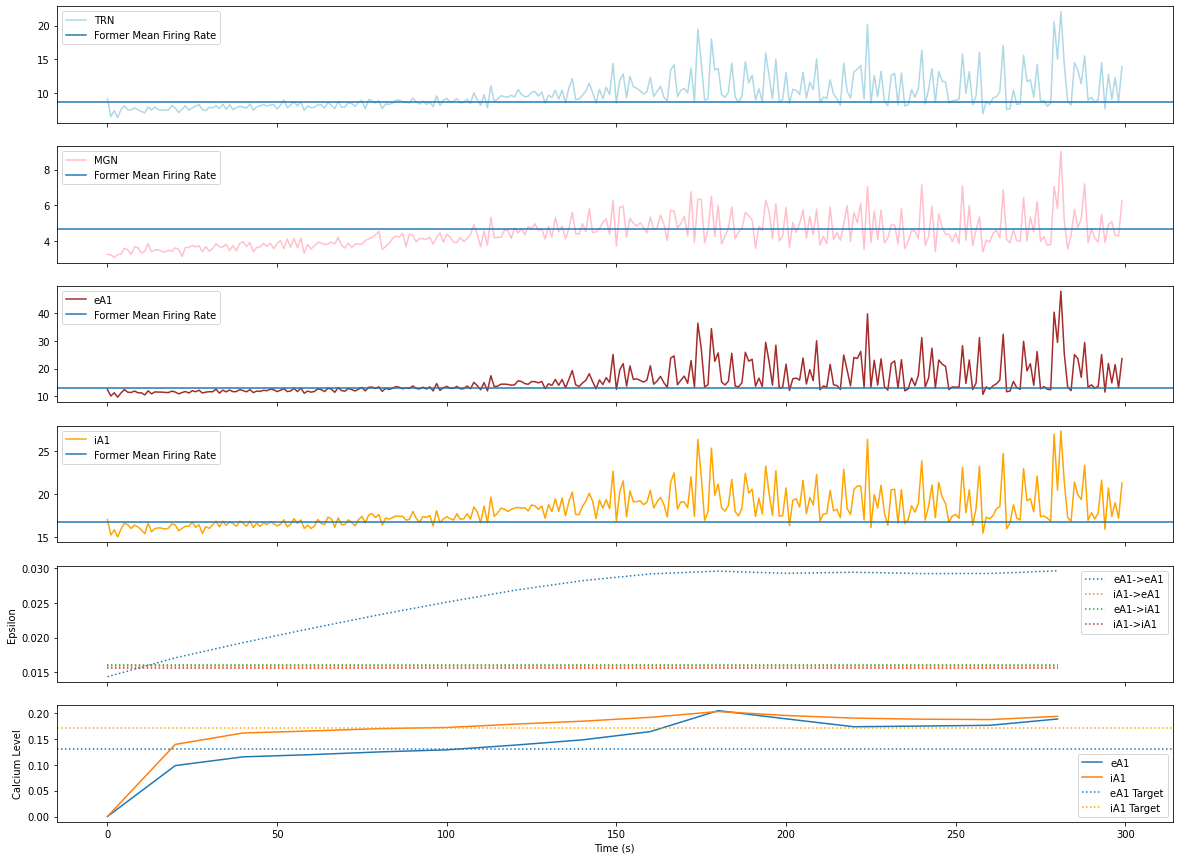

In [556]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)

tstart = 0
tstop = 300000
    
resolution = 1000

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(0, 300, 20)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")

# plt.xticks(range(0, 20, 1), range(0, 1000, 50))

[ax[_].legend() for _ in range(6)];

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-sp-" + fl + ".pdf")